In [140]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.gofplots import ProbPlot

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn import metrics

from hyperopt import STATUS_OK, Trials, fmin, hp, tpe


### Data Overview


##### This dataset shows the home data of a region. These data have such information as how many square meters a house has, how many rooms it has, whether it has a sea view or not. In addition, a price is given according to the characteristics of each house. What is required of us is to find the best model to estimate the prices of the houses using these features.

In [2]:
house_df = pd.read_csv('kc_house_data.csv')
house_df.head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [3]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [4]:
house_df.shape

(21613, 21)

In [5]:
house_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [6]:
round(house_df.describe(include = ['int64','float64']))

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0
mean,4.580302e+09,540088.0,3.0,2.0,2080.0,15107.0,1.0,0.0,0.0,3.0,8.0,1788.0,292.0,1971.0,84.0,98078.0,48.0,-122.0,1987.0,12768.0
std,2.876566e+09,367127.0,1.0,1.0,918.0,41421.0,1.0,0.0,1.0,1.0,1.0,828.0,443.0,29.0,402.0,54.0,0.0,0.0,685.0,27304.0
min,1.000102e+06,75000.0,0.0,0.0,290.0,520.0,1.0,0.0,0.0,1.0,1.0,290.0,0.0,1900.0,0.0,98001.0,47.0,-123.0,399.0,651.0
25%,2.123049e+09,321950.0,3.0,2.0,1427.0,5040.0,1.0,0.0,0.0,3.0,7.0,1190.0,0.0,1951.0,0.0,98033.0,47.0,-122.0,1490.0,5100.0
50%,3.904930e+09,450000.0,3.0,2.0,1910.0,7618.0,2.0,0.0,0.0,3.0,7.0,1560.0,0.0,1975.0,0.0,98065.0,48.0,-122.0,1840.0,7620.0
75%,7.308900e+09,645000.0,4.0,2.0,2550.0,10688.0,2.0,0.0,0.0,4.0,8.0,2210.0,560.0,1997.0,0.0,98118.0,48.0,-122.0,2360.0,10083.0
max,9.900000e+09,7700000.0,33.0,8.0,13540.0,1651359.0,4.0,1.0,4.0,5.0,13.0,9410.0,4820.0,2015.0,2015.0,98199.0,48.0,-121.0,6210.0,871200.0


In [7]:
print(house_df.nunique())

id               21436
date               372
price             4028
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64


In [8]:
data = house_df.drop(['id','date'], axis = 1)

In [9]:
data.isnull().any()

price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [10]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Data Visualization

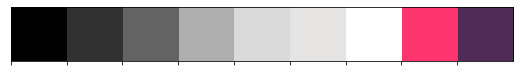

In [11]:
colors_dark = ["#000000", "#313131", '#636363', '#AEAEAE', '#DADADA', '#E5E4E2', '#FFFFFF', '#fe346e', '#512b58']
sns.palplot(colors_dark)

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

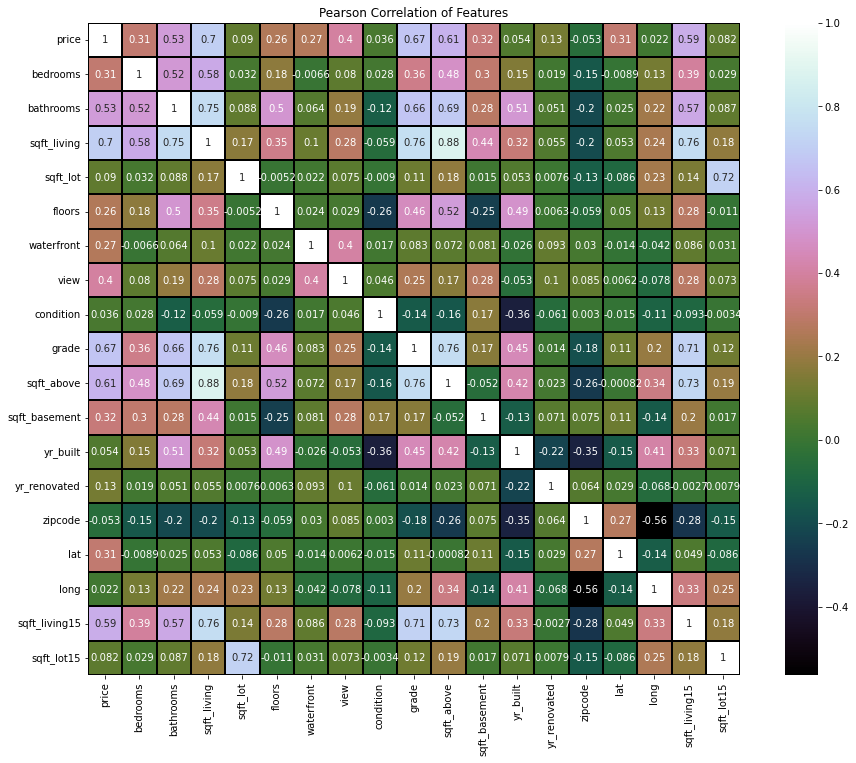

In [15]:
str_list = []

for colname, colvalue in data.iteritems():
    if type(colvalue[1]) == str:
        str_list.append(colname)
        
num_list = data.columns.difference(str_list)
house_num = data[num_list]

f, ax = plt.subplots(figsize=(16,12))
plt.title('Pearson Correlation of Features')
sns.heatmap(house_num.corr(), linewidths = 0.25, vmax = 1.0, square = True, cmap = "cubehelix", linecolor = 'k', annot = True)

In [16]:
corr = data.corr()

high_corr = corr.where(np.triu(np.ones(corr.shape), k = 1).astype(bool))
high_corr = high_corr.unstack().sort_values(ascending = False)
high_corr = high_corr[high_corr > 0.5]

print(high_corr)

sqft_above     sqft_living    0.876597
grade          sqft_living    0.762704
sqft_living15  sqft_living    0.756420
sqft_above     grade          0.755923
sqft_living    bathrooms      0.754665
sqft_living15  sqft_above     0.731870
sqft_lot15     sqft_lot       0.718557
sqft_living15  grade          0.713202
sqft_living    price          0.702035
sqft_above     bathrooms      0.685342
grade          price          0.667434
               bathrooms      0.664983
sqft_above     price          0.605567
sqft_living15  price          0.585379
sqft_living    bedrooms       0.576671
sqft_living15  bathrooms      0.568634
bathrooms      price          0.525138
sqft_above     floors         0.523885
bathrooms      bedrooms       0.515884
yr_built       bathrooms      0.506019
floors         bathrooms      0.500653
dtype: float64


#### Linear Regression Assumptions

##### 1- Data Fit Normal Distribution 

<AxesSubplot:xlabel='sqft_lot15', ylabel='Density'>

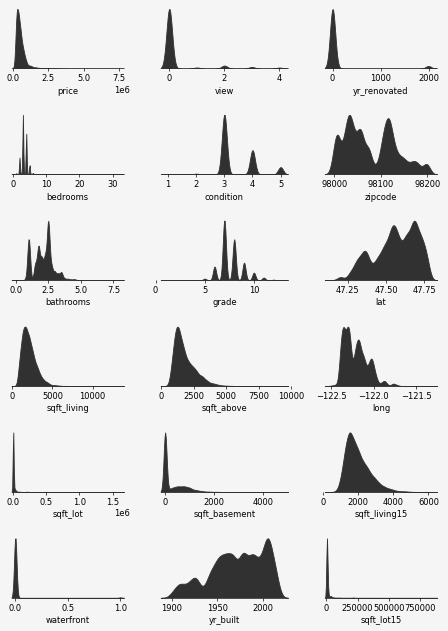

In [17]:
fig = plt.figure(figsize = (14,14), dpi = 60)

gs = fig.add_gridspec(30,40)
gs.update(wspace = 1, hspace = 0.05)

# Creating Axes
ax1 = fig.add_subplot(gs[1:4,0:8]) #1. Dağılım Grafiği
ax2 = fig.add_subplot(gs[6:9, 0:8]) #2. Dağılım Grafiği
ax3 = fig.add_subplot(gs[11:14, 0:8]) #2. Dağılım Grafiği
ax4 = fig.add_subplot(gs[16:19, 0:8]) #2. Dağılım Grafiği
ax5 = fig.add_subplot(gs[21:24, 0:8]) #2. Dağılım Grafiği
ax6 = fig.add_subplot(gs[26:29, 0:8]) #2. Dağılım Grafiği
ax7 = fig.add_subplot(gs[1:4, 9:18]) #2. Dağılım Grafiği
ax8 = fig.add_subplot(gs[6:9, 9:18]) #2. Dağılım Grafiği
ax9 = fig.add_subplot(gs[11:14, 9:18]) #2. Dağılım Grafiği
ax10 = fig.add_subplot(gs[16:19, 9:18]) #2. Dağılım Grafiği
ax11 = fig.add_subplot(gs[21:24, 9:18]) #2. Dağılım Grafiği
ax12 = fig.add_subplot(gs[26:29, 9:18]) #2. Dağılım Grafiği
ax13 = fig.add_subplot(gs[1:4, 19:27]) #2. Dağılım Grafiği
ax14 = fig.add_subplot(gs[6:9, 19:27]) #2. Dağılım Grafiği
ax15 = fig.add_subplot(gs[11:14, 19:27]) #2. Dağılım Grafiği
ax16 = fig.add_subplot(gs[16:19, 19:27]) #2. Dağılım Grafiği
ax17 = fig.add_subplot(gs[21:24, 19:27]) #2. Dağılım Grafiği
ax18 = fig.add_subplot(gs[26:29, 19:27]) #2. Dağılım Grafiği

# Edit Axes

axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13, ax14, ax15, ax16, ax17, ax18]

for ax in axes:
    ax.axes.get_yaxis().set_visible(False)
    ax.set_facecolor('#f6f5f5')
    
    for loc in ['left', 'right', 'top', 'bottom']:
        ax.spines[loc].set_visible(False)

fig.patch.set_facecolor('#f6f5f5')
        
ax1.axes.get_xaxis().set_visible(True)


fig.patch.set_facecolor('#f6f5f5')
        


    
sns.kdeplot(data = data, x = 'price', ax = ax1, shade = True, color = '#313131', alpha = 1)
sns.kdeplot(data = data, x = 'bedrooms', ax = ax2, shade = True, color = '#313131', alpha = 1)
sns.kdeplot(data = data, x = 'bathrooms', ax = ax3, shade = True, color = '#313131', alpha = 1)
sns.kdeplot(data = data, x = 'sqft_living', ax = ax4, shade = True, color = '#313131', alpha = 1)
sns.kdeplot(data = data, x = 'sqft_lot', ax = ax5, shade = True, color = '#313131', alpha = 1)
sns.kdeplot(data = data, x = 'waterfront', ax = ax6, shade = True, color = '#313131', alpha = 1)
sns.kdeplot(data = data, x = 'view', ax = ax7, shade = True, color = '#313131', alpha = 1)
sns.kdeplot(data = data, x = 'condition', ax = ax8, shade = True, color = '#313131', alpha = 1)
sns.kdeplot(data = data, x = 'grade', ax = ax9, shade = True, color = '#313131', alpha = 1)
sns.kdeplot(data = data, x = 'sqft_above', ax = ax10, shade = True, color = '#313131', alpha = 1)
sns.kdeplot(data = data, x = 'sqft_basement', ax = ax11, shade = True, color = '#313131', alpha = 1)
sns.kdeplot(data = data, x = 'yr_built', ax = ax12, shade = True, color = '#313131', alpha = 1)
sns.kdeplot(data = data, x = 'yr_renovated', ax = ax13, shade = True, color = '#313131', alpha = 1)
sns.kdeplot(data = data, x = 'zipcode', ax = ax14, shade = True, color = '#313131', alpha = 1)
sns.kdeplot(data = data, x = 'lat', ax = ax15, shade = True, color = '#313131', alpha = 1)
sns.kdeplot(data = data, x = 'long', ax = ax16, shade = True, color = '#313131', alpha = 1)
sns.kdeplot(data = data, x = 'sqft_living15', ax = ax17, shade = True, color = '#313131', alpha = 1)
sns.kdeplot(data = data, x = 'sqft_lot15', ax = ax18, shade = True, color = '#313131', alpha = 1)


In [18]:
for i in data.columns:
    _, p = stats.shapiro(data[i])
    print(f"{i}: {(round(p,5))}")
    
#According to the shapiro Wilk Normality Test result (p < 0.05), it is seen that the features are not normally distributed.

price: 0.0
bedrooms: 0.0
bathrooms: 0.0
sqft_living: 0.0
sqft_lot: 0.0
floors: 0.0
waterfront: 0.0
view: 0.0
condition: 0.0
grade: 0.0
sqft_above: 0.0
sqft_basement: 0.0
yr_built: 0.0
yr_renovated: 0.0
zipcode: 0.0
lat: 0.0
long: 0.0
sqft_living15: 0.0
sqft_lot15: 0.0


/Users/berkakyildiz/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


##### 2- Multicollinearity

In [19]:
X = data[['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated','zipcode','lat','long','sqft_living15','sqft_lot15']]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]


print(f"{vif_data}: {(round(p,5))}")


/Users/berkakyildiz/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


          feature           VIF
0           price  1.053622e+01
1        bedrooms  2.365334e+01
2       bathrooms  2.882280e+01
3     sqft_living           inf
4        sqft_lot  2.378510e+00
5          floors  1.689394e+01
6      waterfront  1.276220e+00
7            view  1.595318e+00
8       condition  3.493203e+01
9           grade  1.608968e+02
10     sqft_above           inf
11  sqft_basement           inf
12       yr_built  1.021820e+04
13   yr_renovated  1.196750e+00
14        zipcode  1.694878e+06
15            lat  1.592914e+05
16           long  1.377074e+06
17  sqft_living15  2.716137e+01
18     sqft_lot15  2.601933e+00: 0.0


In [20]:
X = data.drop('price', axis=1)
y = data['price']

# Bağımsız değişkenler arasındaki korelasyonu gösteren bir korelasyon matrisi oluşturma
corr_matrix = X.corr()

# Çoklu doğrusal bağımlılık için VIF (Variance Inflation Factor) hesaplama
vif = pd.DataFrame()
vif["variables"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# VIF değerlerini gösterme
print(round(vif))

print(vif.mean())

/Users/berkakyildiz/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


        variables        VIF
0        bedrooms       23.0
1       bathrooms       29.0
2     sqft_living        inf
3        sqft_lot        2.0
4          floors       17.0
5      waterfront        1.0
6            view        2.0
7       condition       35.0
8           grade      147.0
9      sqft_above        inf
10  sqft_basement        inf
11       yr_built     9588.0
12   yr_renovated        1.0
13        zipcode  1630845.0
14            lat   139026.0
15           long  1359553.0
16  sqft_living15       27.0
17     sqft_lot15        3.0
VIF    inf
dtype: float64


/var/folders/kl/36svbsrx26s_9y6_8tmpxjcr0000gn/T/ipykernel_61897/3156964721.py:15: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(vif.mean())


##### 3- AutoCorrelation

In [21]:
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson


# Bağımsız ve bağımlı değişkenleri tanımlama
X = data.drop('price', axis = 1)
y = data['price']

model = sm.OLS(y, X)
results = model.fit()
results.summary().tables[2]


Omnibus:,18403.146,Durbin-Watson:,1.991
Prob(Omnibus):,0.000,Jarque-Bera (JB):,1873534.498
Skew:,3.572,Prob(JB):,0.00
Kurtosis:,48.049,Cond. No.,1.94e+17


##### 4- Linear Assumptions 

/Users/berkakyildiz/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/Users/berkakyildiz/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
/Users/berkakyildiz/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


Text(0.5, 1.0, 'Geri kalan hatalar')

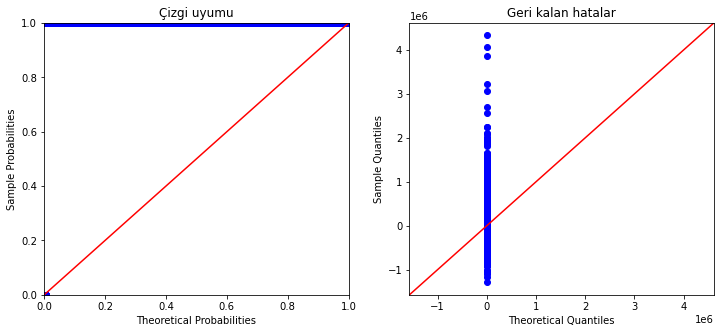

In [22]:
X = data.drop('price', axis = 1)
y = data['price']

# Regresyon modelini oluşturma
model = sm.OLS(y, sm.add_constant(X)).fit()

# Çizgi uyumu görselleştirme
pp_x = ProbPlot(model.fittedvalues)
pp_y = ProbPlot(model.resid)

fig, ax = plt.subplots(1,2,figsize=(12,5))
pp_x.ppplot(ax=ax[0], line='45')
pp_y.qqplot(ax=ax[1], line='45')
ax[0].set_title('Çizgi uyumu')
ax[1].set_title('Geri kalan hatalar')

### Linear Assumptions Results

#### 1- Data Fit Normal Distribution: As a result of the visualizations, it is seen that the data do not show a normal distribution and have a skewed and unbalanced distribution. The assumption that the data show a normal distribution is not provided.

#### 2- Multicollinearity: Most variables have VIF values of 5 and well above 10. This shows that there is a multicollinearity between the variables. The assumption of no multicollinearity is not satisfied.

#### 3- AutoCorrelation: As a result of the Durbin Watson test performed to see the autocorrelation, the autocorrelation was observed as 1.99. There is no autocorrelation between the variables. Assumption provided.

#### 4- Linear Assumptions: The line fit plot compares the predicted values of the dependent variable with the observed values. In cases where the linearity assumption is met, the observed values are expected to show a distribution close to the predicted values. On the other hands, the remaining errors plot checks that the normal distribution of the error terms in the regression model and their variability are constant. For the linearity assumption, there should be no modelizability in the plot of the remaining errors, and the errors should not have variability with respect to the values of the independent variables.

#### As a result of not providing these assumptions, performing linear regression analysis may mislead our results. Therefore, it would be healthier to model with other regression analyzes. But remember, this is a training notebook. 

In [144]:
stats_model = sm.OLS(y, X)
stats_result = stats_model.fit()
stats_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.905
Model:                            OLS   Adj. R-squared (uncentered):              0.905
Method:                 Least Squares   F-statistic:                          1.287e+04
Date:                Tue, 04 Apr 2023   Prob (F-statistic):                        0.00
Time:                        23:14:50   Log-Likelihood:                     -2.9461e+05
No. Observations:               21613   AIC:                                  5.892e+05
Df Residuals:                   21597   BIC:                                  5.894e+05
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms      -3.562e+04   1887.390    -18.872      0.000   -3.93e+04   -3.19e+04
bathrooms      4.234e+04   3136.467     13.500      0.000    3.62e+04    4.85e+04
sqft_living     109.9055      2.256     48.724      0.000     105.484     114.327
sqft_lot          0.1312      0.048      2.742      0.006       0.037       0.225
waterfront     5.833e+05   1.74e+04     33.600      0.000    5.49e+05    6.17e+05
view           5.249e+04   2126.373     24.686      0.000    4.83e+04    5.67e+04
condition      2.691e+04   2315.359     11.624      0.000    2.24e+04    3.15e+04
grade          9.581e+04   2133.801     44.903      0.000    9.16e+04       1e+05
sqft_above       72.5890      2.088     34.763      0.000      68.496      76.682
sqft_basement    37.3165      2.407     15.506      0.000      32.599      42.033
yr_built      -2544.6464     67.021    -37.968      0.000   -2676.013   -2413.280
yr_renovated     20.6412      3.643      5.666      0.000      13.500      27.782
zipcode        -521.7152     17.738    -29.413      0.000    -556.482    -486.948
lat            6.036e+05   1.07e+04     56.456      0.000    5.83e+05    6.25e+05
long          -2.192e+05    1.3e+04    -16.824      0.000   -2.45e+05   -1.94e+05
sqft_living15    22.3571      3.355      6.664      0.000      15.782      28.932
sqft_lot15       -0.3807      0.073     -5.204      0.000      -0.524      -0.237
==============================================================================
Omnibus:                    18359.519   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1857062.968
Skew:                           3.560   Prob(JB):                         0.00
Kurtosis:                      47.850   Cond. No.                     1.87e+17
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 6.29e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

##### Since the floors variable is p > 0.05, we must remove this variable from the dataset before building the model. Also, several linear regression assumptions are not provided. We mentioned them above. However, a linear regression model will still be created for you to understand the logic of linear regression model setup.

### Data Processing

In [24]:
X = data.drop(['price','floors'], axis = 1)
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, shuffle = True, random_state = 42)

##### Data Standardization

Most of the time, we apply the standardization process when we want to set up and train the model with the data. This standardization process is actually the process of standardizing the data.
If we do not standardize the model we will build now, our model will give a biased result. This is because there is a huge difference between numerical values. Suppose we are calculating an arithmetic mean. Let's say that we have 10 pieces of data, and 7 of them have a numerical value of 100, and 3 of them have a numerical value of 30.
When we take the average, the average of these data will give a result closer to 100. So a biased result will occur. But if we standardize the data, it can give us a more accurate result to use in our operations. That's why we do the standardization process.

In [25]:
std_scaler = StandardScaler()
X_train_std = std_scaler.fit_transform(X_train)
X_test_std = std_scaler.transform(X_test)

### Modelling

In [26]:
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring = "neg_mean_squared_error", cv = 5)).mean()
    return rmse

def evaluation(y, y_pred):
    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    r_squared = r2_score(y, y_pred)
    return mae, mse, rmse, r_squared

In [27]:
models = pd.DataFrame(columns=["Model","MAE","MSE","RMSE","R2 Score","RMSE (Cross-Validation)"])

### 1- Linear Regression

In [28]:
linear_model = LinearRegression()
lin_mod = linear_model.fit(X_train_std, y_train)
y_pred = lin_mod.predict(X_test_std)

In [29]:
mae, mse, rmse, r_squared = evaluation(y_test, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lin_mod)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "LinearRegression","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 126628.28958382951
MSE: 44163076760.56855
RMSE: 210150.1290995762
R2 Score: 0.7047678445214649
------------------------------
RMSE Cross-Validation: 202522.57582381254


### 2- Ridge Regression

In [30]:
ridge_model = Ridge()
ridge_mod = ridge_model.fit(X_train_std, y_train)
y_pred = ridge_mod.predict(X_test_std)

mae, mse, rmse, r_squared = evaluation(y_test, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(ridge_mod)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "Ridge Regression","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 126626.38664256116
MSE: 44163368079.74946
RMSE: 210150.82222001764
R2 Score: 0.7047658970396311
------------------------------
RMSE Cross-Validation: 202521.75213798461


### 3- Lasso Regression

In [31]:
lasso = Lasso()
lasso_model = lasso.fit(X_train_std, y_train)
y_pred = lasso_model.predict(X_test_std)

mae, mse, rmse, r_squared = evaluation(y_test, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lasso_model)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "Lasso Regression","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

/Users/berkakyildiz/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19243934795032.375, tolerance: 210410096861.09875
  model = cd_fast.enet_coordinate_descent(


MAE: 126628.26762579323
MSE: 44163115947.59115
RMSE: 210150.22233533597
R2 Score: 0.7047675825544554
------------------------------


/Users/berkakyildiz/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 309687916727826.1, tolerance: 225807564727.4099
  model = cd_fast.enet_coordinate_descent(
/Users/berkakyildiz/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 310778452584038.3, tolerance: 230623895046.63632
  model = cd_fast.enet_coordinate_descent(
/Users/berkakyildiz/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 326292965412869.4, tolerance: 240674810880.25027
  model = cd_fast.enet_coordinate_descent(
/Users/berkakyildiz/opt/anaconda3/lib/python3.9/si

RMSE Cross-Validation: 202522.72094627953


/Users/berkakyildiz/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 317344193951478.25, tolerance: 231517800603.32117
  model = cd_fast.enet_coordinate_descent(


### 4- ElasticNet Regression

In [32]:
elastic_net = ElasticNet()
elastic_model = elastic_net.fit(X_train_std, y_train)
y_pred = elastic_net.predict(X_test_std)

mae, mse, rmse, r_squared = evaluation(y_test, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(elastic_model)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "ElasticNet Regression","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 127141.26243884329
MSE: 49885750525.37902
RMSE: 223351.1820550297
R2 Score: 0.6665115128839472
------------------------------


/Users/berkakyildiz/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 456876498712586.1, tolerance: 225807564727.4099
  model = cd_fast.enet_coordinate_descent(
/Users/berkakyildiz/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 468686228543821.6, tolerance: 230623895046.63632
  model = cd_fast.enet_coordinate_descent(
/Users/berkakyildiz/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 487664167267935.25, tolerance: 240674810880.25027
  model = cd_fast.enet_coordinate_descent(
/Users/berkakyildiz/opt/anaconda3/lib/python3.9/s

RMSE Cross-Validation: 228155.35225510816


/Users/berkakyildiz/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 459633864807044.5, tolerance: 231517800603.32117
  model = cd_fast.enet_coordinate_descent(


### 5- Support Vector Machines

In [33]:
svr = SVR(C=100000)
svr_model = svr.fit(X_train_std, y_train)
y_pred = svr.predict(X_test_std)

mae, mse, rmse, r_squared = evaluation(y_test, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(svr_model)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "SVR","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 91684.03162895405
MSE: 46729156845.33453
RMSE: 216169.2782181005
R2 Score: 0.6876134836814515
------------------------------
RMSE Cross-Validation: 303695.58419493044


### 6- RandomForest Regressor

In [34]:
random_forest = RandomForestRegressor(n_estimators=100)
random_model = random_forest.fit(X_train_std, y_train)
y_pred = random_forest.predict(X_test_std)

mae, mse, rmse, r_squared = evaluation(y_test, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(random_model)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "RandomForestRegressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 71962.7206495453
MSE: 19575630841.52317
RMSE: 139912.9402218507
R2 Score: 0.8691360269229446
------------------------------
RMSE Cross-Validation: 128322.74550762372


### 7- XGBoost

In [35]:
xgb = XGBRegressor(n_estimators=1000, learning_rate=0.01)
xgb_model = xgb.fit(X_train_std, y_train)
y_pred = xgb_model.predict(X_test_std)

mae, mse, rmse, r_squared = evaluation(y_test, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(xgb_model)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "XGBRegressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 69924.95219108531
MSE: 18782647974.54485
RMSE: 137049.80107444464
R2 Score: 0.8744371530728461
------------------------------
RMSE Cross-Validation: 120783.48760468909


### 8- Cat Boost

In [36]:
cat = CatBoostRegressor(n_estimators = 1000, learning_rate = 0.01)
cat_model = cat.fit(X_train_std, y_train, use_best_model = True)
y_pred = cat_model.predict(X_test_std)

0:	learn: 358061.9059347	total: 68.4ms	remaining: 1m 8s
1:	learn: 355784.5471731	total: 73.4ms	remaining: 36.6s
2:	learn: 353653.3815619	total: 76.9ms	remaining: 25.6s
3:	learn: 351440.6707523	total: 79.2ms	remaining: 19.7s
4:	learn: 349384.9748170	total: 82.2ms	remaining: 16.3s
5:	learn: 347327.3018844	total: 85.6ms	remaining: 14.2s
6:	learn: 345230.1992432	total: 88.4ms	remaining: 12.5s
7:	learn: 343074.4916605	total: 91.3ms	remaining: 11.3s
8:	learn: 340930.9242991	total: 94.1ms	remaining: 10.4s
9:	learn: 338924.9430253	total: 96.9ms	remaining: 9.59s
10:	learn: 337024.5760950	total: 100ms	remaining: 8.99s
11:	learn: 335024.4547650	total: 103ms	remaining: 8.46s
12:	learn: 332992.5174610	total: 106ms	remaining: 8.03s
13:	learn: 331032.7974651	total: 109ms	remaining: 7.69s
14:	learn: 329082.4986478	total: 113ms	remaining: 7.39s
15:	learn: 327107.4285699	total: 117ms	remaining: 7.17s
16:	learn: 325152.7703243	total: 119ms	remaining: 6.89s
17:	learn: 323337.9032203	total: 122ms	remaining

You should provide test set for use best model. use_best_model parameter has been switched to false value.


26:	learn: 307199.1542541	total: 149ms	remaining: 5.36s
27:	learn: 305504.0583289	total: 151ms	remaining: 5.24s
28:	learn: 303832.3512372	total: 154ms	remaining: 5.14s
29:	learn: 302163.4817687	total: 156ms	remaining: 5.04s
30:	learn: 300564.5069543	total: 159ms	remaining: 4.96s
31:	learn: 298917.7572388	total: 161ms	remaining: 4.88s
32:	learn: 297336.5466296	total: 165ms	remaining: 4.83s
33:	learn: 295855.2664784	total: 167ms	remaining: 4.74s
34:	learn: 294224.7641106	total: 169ms	remaining: 4.67s
35:	learn: 292605.0497109	total: 172ms	remaining: 4.6s
36:	learn: 291092.2379457	total: 174ms	remaining: 4.54s
37:	learn: 289546.9932171	total: 178ms	remaining: 4.5s
38:	learn: 288065.4993149	total: 180ms	remaining: 4.45s
39:	learn: 286544.8625381	total: 185ms	remaining: 4.43s
40:	learn: 285036.0838659	total: 188ms	remaining: 4.39s
41:	learn: 283534.0089731	total: 190ms	remaining: 4.34s
42:	learn: 282029.6968656	total: 196ms	remaining: 4.37s
43:	learn: 280650.1611232	total: 199ms	remaining: 

177:	learn: 174466.8405984	total: 534ms	remaining: 2.47s
178:	learn: 174052.3543273	total: 537ms	remaining: 2.46s
179:	learn: 173620.5610178	total: 554ms	remaining: 2.52s
180:	learn: 173266.3226400	total: 558ms	remaining: 2.52s
181:	learn: 172901.4197469	total: 565ms	remaining: 2.54s
182:	learn: 172535.7631773	total: 569ms	remaining: 2.54s
183:	learn: 172146.3027409	total: 572ms	remaining: 2.54s
184:	learn: 171743.0910481	total: 583ms	remaining: 2.57s
185:	learn: 171366.5196627	total: 586ms	remaining: 2.57s
186:	learn: 171036.0056134	total: 592ms	remaining: 2.57s
187:	learn: 170694.2114744	total: 601ms	remaining: 2.6s
188:	learn: 170360.3854356	total: 605ms	remaining: 2.59s
189:	learn: 170000.0079309	total: 607ms	remaining: 2.59s
190:	learn: 169654.0632203	total: 610ms	remaining: 2.58s
191:	learn: 169325.7737649	total: 613ms	remaining: 2.58s
192:	learn: 169009.9167404	total: 616ms	remaining: 2.58s
193:	learn: 168686.5790519	total: 619ms	remaining: 2.57s
194:	learn: 168309.9271420	total

360:	learn: 135162.7049430	total: 1.03s	remaining: 1.83s
361:	learn: 135050.3064046	total: 1.04s	remaining: 1.83s
362:	learn: 134936.8259744	total: 1.04s	remaining: 1.82s
363:	learn: 134778.4418023	total: 1.04s	remaining: 1.82s
364:	learn: 134664.0423882	total: 1.04s	remaining: 1.82s
365:	learn: 134527.1365876	total: 1.05s	remaining: 1.81s
366:	learn: 134386.8948828	total: 1.05s	remaining: 1.81s
367:	learn: 134266.4007228	total: 1.05s	remaining: 1.81s
368:	learn: 134143.6230594	total: 1.05s	remaining: 1.8s
369:	learn: 134042.0153158	total: 1.06s	remaining: 1.8s
370:	learn: 133960.1787141	total: 1.06s	remaining: 1.8s
371:	learn: 133886.8910440	total: 1.06s	remaining: 1.79s
372:	learn: 133814.2555921	total: 1.07s	remaining: 1.79s
373:	learn: 133710.9679055	total: 1.07s	remaining: 1.79s
374:	learn: 133514.6862500	total: 1.07s	remaining: 1.79s
375:	learn: 133435.4376217	total: 1.08s	remaining: 1.79s
376:	learn: 133269.0116672	total: 1.08s	remaining: 1.78s
377:	learn: 133157.1231428	total: 

540:	learn: 121228.6356954	total: 1.5s	remaining: 1.28s
541:	learn: 121179.2625884	total: 1.51s	remaining: 1.27s
542:	learn: 121134.9335643	total: 1.51s	remaining: 1.27s
543:	learn: 121102.5928518	total: 1.51s	remaining: 1.27s
544:	learn: 121039.4276650	total: 1.51s	remaining: 1.26s
545:	learn: 120997.3412102	total: 1.52s	remaining: 1.26s
546:	learn: 120954.3350056	total: 1.52s	remaining: 1.26s
547:	learn: 120894.5230365	total: 1.52s	remaining: 1.25s
548:	learn: 120865.3835880	total: 1.52s	remaining: 1.25s
549:	learn: 120837.3033504	total: 1.53s	remaining: 1.25s
550:	learn: 120782.3208751	total: 1.53s	remaining: 1.25s
551:	learn: 120733.1751772	total: 1.53s	remaining: 1.24s
552:	learn: 120696.9953107	total: 1.53s	remaining: 1.24s
553:	learn: 120611.3896258	total: 1.54s	remaining: 1.24s
554:	learn: 120555.0491306	total: 1.54s	remaining: 1.23s
555:	learn: 120493.8482992	total: 1.54s	remaining: 1.23s
556:	learn: 120400.0663452	total: 1.54s	remaining: 1.23s
557:	learn: 120353.7304042	total

711:	learn: 114232.4195321	total: 2.01s	remaining: 812ms
712:	learn: 114192.9965501	total: 2.01s	remaining: 809ms
713:	learn: 114170.4319505	total: 2.01s	remaining: 806ms
714:	learn: 114149.0022717	total: 2.01s	remaining: 803ms
715:	learn: 114117.0639724	total: 2.02s	remaining: 800ms
716:	learn: 114100.3888310	total: 2.02s	remaining: 797ms
717:	learn: 114072.7045627	total: 2.02s	remaining: 794ms
718:	learn: 114039.9966324	total: 2.02s	remaining: 791ms
719:	learn: 114008.6677801	total: 2.03s	remaining: 788ms
720:	learn: 113988.4744805	total: 2.03s	remaining: 785ms
721:	learn: 113908.8097743	total: 2.03s	remaining: 782ms
722:	learn: 113875.4214332	total: 2.03s	remaining: 779ms
723:	learn: 113845.0021686	total: 2.04s	remaining: 776ms
724:	learn: 113820.1624940	total: 2.04s	remaining: 773ms
725:	learn: 113793.2967999	total: 2.04s	remaining: 770ms
726:	learn: 113774.3246346	total: 2.04s	remaining: 767ms
727:	learn: 113751.9827893	total: 2.04s	remaining: 764ms
728:	learn: 113731.3942475	tota

874:	learn: 109205.3812063	total: 2.4s	remaining: 342ms
875:	learn: 109184.0685958	total: 2.4s	remaining: 340ms
876:	learn: 109160.7026750	total: 2.4s	remaining: 337ms
877:	learn: 109134.2821592	total: 2.4s	remaining: 334ms
878:	learn: 109112.7593493	total: 2.4s	remaining: 331ms
879:	learn: 109087.2957632	total: 2.41s	remaining: 328ms
880:	learn: 109067.8051062	total: 2.41s	remaining: 326ms
881:	learn: 109039.5039204	total: 2.41s	remaining: 323ms
882:	learn: 109018.7348398	total: 2.41s	remaining: 320ms
883:	learn: 108996.6008961	total: 2.42s	remaining: 317ms
884:	learn: 108983.2605111	total: 2.42s	remaining: 314ms
885:	learn: 108965.4855649	total: 2.42s	remaining: 312ms
886:	learn: 108943.8856218	total: 2.42s	remaining: 309ms
887:	learn: 108918.0405752	total: 2.43s	remaining: 306ms
888:	learn: 108897.3592543	total: 2.43s	remaining: 303ms
889:	learn: 108870.0801223	total: 2.43s	remaining: 300ms
890:	learn: 108845.2452990	total: 2.43s	remaining: 298ms
891:	learn: 108818.4905148	total: 2.

In [37]:
mae, mse, rmse, r_squared = evaluation(y_test, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(cat_model)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "Cat Boost Regressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 74473.56827616511
MSE: 16674315809.097492
RMSE: 129129.06647651989
R2 Score: 0.8885314484736029
------------------------------
0:	learn: 359053.7327126	total: 4.42ms	remaining: 4.42s
1:	learn: 356800.7084059	total: 6.59ms	remaining: 3.29s
2:	learn: 354542.5915177	total: 8.79ms	remaining: 2.92s
3:	learn: 352297.0044577	total: 10.7ms	remaining: 2.67s
4:	learn: 350014.8214745	total: 13.6ms	remaining: 2.7s
5:	learn: 347776.4014202	total: 19ms	remaining: 3.15s
6:	learn: 345566.8750540	total: 24ms	remaining: 3.4s
7:	learn: 343376.9466735	total: 27.7ms	remaining: 3.43s
8:	learn: 341161.8981411	total: 30.2ms	remaining: 3.33s
9:	learn: 339176.6324433	total: 33.3ms	remaining: 3.3s
10:	learn: 337047.4088672	total: 37.3ms	remaining: 3.36s
11:	learn: 335008.6369981	total: 41ms	remaining: 3.38s
12:	learn: 332968.8207831	total: 43.3ms	remaining: 3.29s
13:	learn: 331052.4284075	total: 46.2ms	remaining: 3.25s
14:	learn: 329056.0257028	total: 49.1ms	remaining: 3.22s
15:	learn: 327068.7349722	total:

160:	learn: 179538.2642520	total: 438ms	remaining: 2.28s
161:	learn: 179118.4545053	total: 440ms	remaining: 2.28s
162:	learn: 178684.1452085	total: 443ms	remaining: 2.27s
163:	learn: 178167.7767419	total: 445ms	remaining: 2.27s
164:	learn: 177707.5004108	total: 448ms	remaining: 2.27s
165:	learn: 177299.9058818	total: 450ms	remaining: 2.26s
166:	learn: 176816.5283730	total: 452ms	remaining: 2.26s
167:	learn: 176427.0437872	total: 455ms	remaining: 2.25s
168:	learn: 175996.5305087	total: 458ms	remaining: 2.25s
169:	learn: 175557.6708275	total: 462ms	remaining: 2.26s
170:	learn: 175146.0676261	total: 465ms	remaining: 2.25s
171:	learn: 174735.9483357	total: 467ms	remaining: 2.25s
172:	learn: 174316.8465171	total: 469ms	remaining: 2.24s
173:	learn: 173934.9205985	total: 471ms	remaining: 2.24s
174:	learn: 173576.3242582	total: 473ms	remaining: 2.23s
175:	learn: 173194.1063427	total: 476ms	remaining: 2.23s
176:	learn: 172763.2530264	total: 478ms	remaining: 2.22s
177:	learn: 172369.7204711	tota

329:	learn: 137607.5485469	total: 893ms	remaining: 1.81s
330:	learn: 137409.5184306	total: 895ms	remaining: 1.81s
331:	learn: 137232.5509494	total: 897ms	remaining: 1.8s
332:	learn: 137118.5341759	total: 900ms	remaining: 1.8s
333:	learn: 137031.9959929	total: 902ms	remaining: 1.8s
334:	learn: 136938.8058718	total: 905ms	remaining: 1.8s
335:	learn: 136829.7719602	total: 907ms	remaining: 1.79s
336:	learn: 136714.8507125	total: 910ms	remaining: 1.79s
337:	learn: 136632.5724058	total: 913ms	remaining: 1.79s
338:	learn: 136493.4675880	total: 915ms	remaining: 1.78s
339:	learn: 136422.7360119	total: 917ms	remaining: 1.78s
340:	learn: 136341.5026648	total: 920ms	remaining: 1.78s
341:	learn: 136251.2793091	total: 922ms	remaining: 1.77s
342:	learn: 136144.0176312	total: 925ms	remaining: 1.77s
343:	learn: 136034.0894414	total: 928ms	remaining: 1.77s
344:	learn: 135926.8178401	total: 930ms	remaining: 1.77s
345:	learn: 135750.5634704	total: 933ms	remaining: 1.76s
346:	learn: 135680.2344345	total: 9

494:	learn: 123929.8366763	total: 1.33s	remaining: 1.36s
495:	learn: 123880.8144795	total: 1.33s	remaining: 1.35s
496:	learn: 123823.0961262	total: 1.34s	remaining: 1.35s
497:	learn: 123777.6845010	total: 1.34s	remaining: 1.35s
498:	learn: 123716.1968608	total: 1.34s	remaining: 1.35s
499:	learn: 123667.2654982	total: 1.34s	remaining: 1.34s
500:	learn: 123630.1435833	total: 1.35s	remaining: 1.34s
501:	learn: 123585.8966457	total: 1.35s	remaining: 1.34s
502:	learn: 123536.8525131	total: 1.35s	remaining: 1.34s
503:	learn: 123497.8782176	total: 1.36s	remaining: 1.33s
504:	learn: 123438.4398462	total: 1.36s	remaining: 1.33s
505:	learn: 123327.2107316	total: 1.36s	remaining: 1.33s
506:	learn: 123293.4781797	total: 1.36s	remaining: 1.32s
507:	learn: 123251.6670446	total: 1.37s	remaining: 1.32s
508:	learn: 123194.2177318	total: 1.37s	remaining: 1.32s
509:	learn: 123126.3039234	total: 1.37s	remaining: 1.32s
510:	learn: 123063.8741486	total: 1.38s	remaining: 1.32s
511:	learn: 123009.7082083	tota

659:	learn: 116640.1167659	total: 1.78s	remaining: 918ms
660:	learn: 116613.4032693	total: 1.78s	remaining: 915ms
661:	learn: 116583.4450905	total: 1.79s	remaining: 913ms
662:	learn: 116549.3648959	total: 1.79s	remaining: 910ms
663:	learn: 116472.3174075	total: 1.79s	remaining: 907ms
664:	learn: 116436.4131787	total: 1.79s	remaining: 904ms
665:	learn: 116407.5095757	total: 1.8s	remaining: 902ms
666:	learn: 116372.2065607	total: 1.8s	remaining: 899ms
667:	learn: 116347.4517399	total: 1.8s	remaining: 896ms
668:	learn: 116311.5064548	total: 1.8s	remaining: 893ms
669:	learn: 116288.7881340	total: 1.81s	remaining: 891ms
670:	learn: 116263.2866176	total: 1.81s	remaining: 888ms
671:	learn: 116228.8896015	total: 1.81s	remaining: 885ms
672:	learn: 116208.5974320	total: 1.81s	remaining: 882ms
673:	learn: 116179.3716289	total: 1.82s	remaining: 879ms
674:	learn: 116151.7846556	total: 1.82s	remaining: 876ms
675:	learn: 116107.2570679	total: 1.82s	remaining: 873ms
676:	learn: 116037.0156397	total: 1

807:	learn: 111714.1928209	total: 2.17s	remaining: 516ms
808:	learn: 111693.6627111	total: 2.17s	remaining: 513ms
809:	learn: 111669.7288474	total: 2.18s	remaining: 511ms
810:	learn: 111649.4667406	total: 2.18s	remaining: 508ms
811:	learn: 111625.9571770	total: 2.18s	remaining: 505ms
812:	learn: 111603.3384672	total: 2.19s	remaining: 503ms
813:	learn: 111574.4220787	total: 2.19s	remaining: 500ms
814:	learn: 111537.1410657	total: 2.19s	remaining: 497ms
815:	learn: 111500.2075619	total: 2.19s	remaining: 494ms
816:	learn: 111474.3968213	total: 2.19s	remaining: 492ms
817:	learn: 111453.2754131	total: 2.2s	remaining: 489ms
818:	learn: 111436.1163998	total: 2.2s	remaining: 486ms
819:	learn: 111410.7587960	total: 2.2s	remaining: 484ms
820:	learn: 111393.9611787	total: 2.21s	remaining: 481ms
821:	learn: 111375.1964024	total: 2.21s	remaining: 478ms
822:	learn: 111329.4169229	total: 2.21s	remaining: 475ms
823:	learn: 111307.5643736	total: 2.21s	remaining: 472ms
824:	learn: 111264.0397154	total: 

962:	learn: 107922.6455251	total: 2.56s	remaining: 98.5ms
963:	learn: 107902.9537329	total: 2.57s	remaining: 95.9ms
964:	learn: 107875.5342079	total: 2.57s	remaining: 93.3ms
965:	learn: 107847.6822761	total: 2.58s	remaining: 90.6ms
966:	learn: 107831.0613131	total: 2.58s	remaining: 88ms
967:	learn: 107785.8393211	total: 2.58s	remaining: 85.3ms
968:	learn: 107774.9150016	total: 2.58s	remaining: 82.6ms
969:	learn: 107755.9064720	total: 2.58s	remaining: 79.9ms
970:	learn: 107739.6923415	total: 2.59s	remaining: 77.3ms
971:	learn: 107719.7398973	total: 2.59s	remaining: 74.6ms
972:	learn: 107698.8776626	total: 2.59s	remaining: 71.9ms
973:	learn: 107680.7486486	total: 2.59s	remaining: 69.3ms
974:	learn: 107660.7079975	total: 2.6s	remaining: 66.6ms
975:	learn: 107620.7759836	total: 2.6s	remaining: 63.9ms
976:	learn: 107584.3798926	total: 2.6s	remaining: 61.2ms
977:	learn: 107565.8702014	total: 2.6s	remaining: 58.6ms
978:	learn: 107544.6830820	total: 2.6s	remaining: 55.9ms
979:	learn: 107500.85

109:	learn: 211029.3133400	total: 280ms	remaining: 2.27s
110:	learn: 210264.0827672	total: 322ms	remaining: 2.58s
111:	learn: 209521.3503095	total: 329ms	remaining: 2.61s
112:	learn: 208775.1298700	total: 335ms	remaining: 2.63s
113:	learn: 208077.4527211	total: 339ms	remaining: 2.63s
114:	learn: 207355.6533679	total: 342ms	remaining: 2.63s
115:	learn: 206655.2993305	total: 344ms	remaining: 2.62s
116:	learn: 205825.3610339	total: 346ms	remaining: 2.61s
117:	learn: 205104.5388753	total: 349ms	remaining: 2.61s
118:	learn: 204433.6146641	total: 352ms	remaining: 2.6s
119:	learn: 203641.8110073	total: 354ms	remaining: 2.6s
120:	learn: 202949.9028786	total: 357ms	remaining: 2.59s
121:	learn: 202289.1677173	total: 360ms	remaining: 2.59s
122:	learn: 201686.0716928	total: 363ms	remaining: 2.59s
123:	learn: 201030.7826603	total: 365ms	remaining: 2.58s
124:	learn: 200409.6849840	total: 368ms	remaining: 2.58s
125:	learn: 199727.5699095	total: 371ms	remaining: 2.57s
126:	learn: 199131.6231931	total:

276:	learn: 144687.8157313	total: 747ms	remaining: 1.95s
277:	learn: 144422.1088465	total: 750ms	remaining: 1.95s
278:	learn: 144215.9139091	total: 753ms	remaining: 1.95s
279:	learn: 144021.2735228	total: 755ms	remaining: 1.94s
280:	learn: 143800.0059437	total: 758ms	remaining: 1.94s
281:	learn: 143632.5372351	total: 760ms	remaining: 1.94s
282:	learn: 143438.1745704	total: 763ms	remaining: 1.93s
283:	learn: 143265.6738053	total: 765ms	remaining: 1.93s
284:	learn: 143100.5370796	total: 769ms	remaining: 1.93s
285:	learn: 142925.5604125	total: 771ms	remaining: 1.93s
286:	learn: 142704.8005793	total: 774ms	remaining: 1.92s
287:	learn: 142492.5822079	total: 776ms	remaining: 1.92s
288:	learn: 142334.5767377	total: 779ms	remaining: 1.92s
289:	learn: 142176.0187646	total: 781ms	remaining: 1.91s
290:	learn: 141962.0467086	total: 783ms	remaining: 1.91s
291:	learn: 141802.4406213	total: 786ms	remaining: 1.91s
292:	learn: 141623.7417005	total: 788ms	remaining: 1.9s
293:	learn: 141465.6543598	total

431:	learn: 126872.0798627	total: 1.14s	remaining: 1.5s
432:	learn: 126808.6189148	total: 1.14s	remaining: 1.49s
433:	learn: 126746.0439160	total: 1.14s	remaining: 1.49s
434:	learn: 126673.3083147	total: 1.14s	remaining: 1.49s
435:	learn: 126623.2671272	total: 1.15s	remaining: 1.48s
436:	learn: 126538.8941285	total: 1.15s	remaining: 1.48s
437:	learn: 126482.7130011	total: 1.15s	remaining: 1.48s
438:	learn: 126445.1415574	total: 1.15s	remaining: 1.47s
439:	learn: 126382.0667189	total: 1.16s	remaining: 1.47s
440:	learn: 126322.6727496	total: 1.16s	remaining: 1.47s
441:	learn: 126216.0080747	total: 1.16s	remaining: 1.47s
442:	learn: 126111.6190070	total: 1.17s	remaining: 1.47s
443:	learn: 126037.7043141	total: 1.17s	remaining: 1.46s
444:	learn: 125976.5503235	total: 1.17s	remaining: 1.46s
445:	learn: 125922.3880912	total: 1.17s	remaining: 1.46s
446:	learn: 125834.2700279	total: 1.18s	remaining: 1.46s
447:	learn: 125800.9227551	total: 1.18s	remaining: 1.45s
448:	learn: 125701.9887263	total

584:	learn: 118981.9972142	total: 1.53s	remaining: 1.08s
585:	learn: 118967.9125785	total: 1.53s	remaining: 1.08s
586:	learn: 118928.4009693	total: 1.53s	remaining: 1.08s
587:	learn: 118858.5659958	total: 1.53s	remaining: 1.07s
588:	learn: 118836.3187692	total: 1.53s	remaining: 1.07s
589:	learn: 118788.7160645	total: 1.54s	remaining: 1.07s
590:	learn: 118743.4953014	total: 1.54s	remaining: 1.06s
591:	learn: 118683.7309247	total: 1.54s	remaining: 1.06s
592:	learn: 118628.2877114	total: 1.54s	remaining: 1.06s
593:	learn: 118609.7064047	total: 1.55s	remaining: 1.06s
594:	learn: 118547.8568855	total: 1.55s	remaining: 1.05s
595:	learn: 118512.3232597	total: 1.55s	remaining: 1.05s
596:	learn: 118474.7863786	total: 1.55s	remaining: 1.05s
597:	learn: 118433.2945032	total: 1.56s	remaining: 1.05s
598:	learn: 118394.6678501	total: 1.56s	remaining: 1.04s
599:	learn: 118349.3492070	total: 1.56s	remaining: 1.04s
600:	learn: 118307.9767652	total: 1.56s	remaining: 1.04s
601:	learn: 118268.7552530	tota

739:	learn: 113680.3679341	total: 1.92s	remaining: 673ms
740:	learn: 113658.4105625	total: 1.92s	remaining: 671ms
741:	learn: 113627.1812722	total: 1.92s	remaining: 668ms
742:	learn: 113591.4891237	total: 1.92s	remaining: 665ms
743:	learn: 113564.5591338	total: 1.93s	remaining: 663ms
744:	learn: 113519.7897855	total: 1.93s	remaining: 660ms
745:	learn: 113492.6636524	total: 1.93s	remaining: 657ms
746:	learn: 113448.2932583	total: 1.93s	remaining: 655ms
747:	learn: 113420.0308686	total: 1.94s	remaining: 652ms
748:	learn: 113401.3228161	total: 1.94s	remaining: 649ms
749:	learn: 113378.4510744	total: 1.94s	remaining: 647ms
750:	learn: 113355.8298535	total: 1.94s	remaining: 644ms
751:	learn: 113312.0939841	total: 1.95s	remaining: 642ms
752:	learn: 113274.3221843	total: 1.95s	remaining: 639ms
753:	learn: 113248.9541845	total: 1.95s	remaining: 636ms
754:	learn: 113229.1852945	total: 1.95s	remaining: 634ms
755:	learn: 113209.3348547	total: 1.96s	remaining: 631ms
756:	learn: 113185.2829668	tota

902:	learn: 109585.5474290	total: 2.31s	remaining: 248ms
903:	learn: 109566.6815685	total: 2.31s	remaining: 245ms
904:	learn: 109541.2399845	total: 2.32s	remaining: 243ms
905:	learn: 109501.5147990	total: 2.32s	remaining: 241ms
906:	learn: 109481.4019880	total: 2.32s	remaining: 238ms
907:	learn: 109450.7348047	total: 2.32s	remaining: 236ms
908:	learn: 109420.8813261	total: 2.33s	remaining: 233ms
909:	learn: 109402.4756357	total: 2.33s	remaining: 230ms
910:	learn: 109380.7618975	total: 2.33s	remaining: 228ms
911:	learn: 109359.3650150	total: 2.33s	remaining: 225ms
912:	learn: 109342.0271772	total: 2.34s	remaining: 223ms
913:	learn: 109314.1557083	total: 2.34s	remaining: 220ms
914:	learn: 109296.8714734	total: 2.34s	remaining: 218ms
915:	learn: 109273.0474519	total: 2.34s	remaining: 215ms
916:	learn: 109252.4515503	total: 2.35s	remaining: 212ms
917:	learn: 109231.8610568	total: 2.35s	remaining: 210ms
918:	learn: 109191.9943971	total: 2.35s	remaining: 207ms
919:	learn: 109162.2996143	tota

46:	learn: 283792.2615081	total: 115ms	remaining: 2.33s
47:	learn: 282277.6010098	total: 118ms	remaining: 2.33s
48:	learn: 280823.5151739	total: 120ms	remaining: 2.33s
49:	learn: 279392.2191979	total: 123ms	remaining: 2.33s
50:	learn: 277947.5862625	total: 125ms	remaining: 2.33s
51:	learn: 276548.1354945	total: 128ms	remaining: 2.33s
52:	learn: 275110.0224099	total: 130ms	remaining: 2.32s
53:	learn: 273690.8550882	total: 132ms	remaining: 2.32s
54:	learn: 272352.3176962	total: 135ms	remaining: 2.31s
55:	learn: 270964.3078014	total: 137ms	remaining: 2.31s
56:	learn: 269635.8350708	total: 140ms	remaining: 2.31s
57:	learn: 268312.4216848	total: 142ms	remaining: 2.31s
58:	learn: 267039.1822925	total: 145ms	remaining: 2.31s
59:	learn: 265788.2729616	total: 148ms	remaining: 2.32s
60:	learn: 264449.5318354	total: 150ms	remaining: 2.31s
61:	learn: 263158.1060191	total: 153ms	remaining: 2.31s
62:	learn: 261933.4043259	total: 155ms	remaining: 2.31s
63:	learn: 260659.5932815	total: 157ms	remaining

201:	learn: 166261.0129843	total: 506ms	remaining: 2s
202:	learn: 165916.0398646	total: 509ms	remaining: 2s
203:	learn: 165642.6886408	total: 511ms	remaining: 1.99s
204:	learn: 165366.0466715	total: 514ms	remaining: 1.99s
205:	learn: 165040.3287839	total: 516ms	remaining: 1.99s
206:	learn: 164730.8124304	total: 519ms	remaining: 1.99s
207:	learn: 164432.4132188	total: 521ms	remaining: 1.98s
208:	learn: 164124.4769036	total: 523ms	remaining: 1.98s
209:	learn: 163780.3715859	total: 526ms	remaining: 1.98s
210:	learn: 163482.2768904	total: 528ms	remaining: 1.98s
211:	learn: 163162.4431028	total: 531ms	remaining: 1.97s
212:	learn: 162861.6964297	total: 533ms	remaining: 1.97s
213:	learn: 162503.6400708	total: 537ms	remaining: 1.97s
214:	learn: 162168.4244002	total: 539ms	remaining: 1.97s
215:	learn: 161869.3107257	total: 542ms	remaining: 1.97s
216:	learn: 161604.9325378	total: 544ms	remaining: 1.96s
217:	learn: 161298.0135793	total: 546ms	remaining: 1.96s
218:	learn: 160982.8116316	total: 548

360:	learn: 136257.1931285	total: 896ms	remaining: 1.59s
361:	learn: 136061.6608362	total: 899ms	remaining: 1.58s
362:	learn: 135937.9267652	total: 902ms	remaining: 1.58s
363:	learn: 135721.2589637	total: 904ms	remaining: 1.58s
364:	learn: 135622.4869829	total: 906ms	remaining: 1.58s
365:	learn: 135447.9557619	total: 909ms	remaining: 1.57s
366:	learn: 135365.1965611	total: 911ms	remaining: 1.57s
367:	learn: 135301.1828826	total: 914ms	remaining: 1.57s
368:	learn: 135255.4987419	total: 915ms	remaining: 1.56s
369:	learn: 135119.0241605	total: 917ms	remaining: 1.56s
370:	learn: 135011.7736005	total: 920ms	remaining: 1.56s
371:	learn: 134967.3042994	total: 922ms	remaining: 1.56s
372:	learn: 134877.6095401	total: 925ms	remaining: 1.55s
373:	learn: 134796.6487475	total: 928ms	remaining: 1.55s
374:	learn: 134720.4928696	total: 930ms	remaining: 1.55s
375:	learn: 134629.2647610	total: 932ms	remaining: 1.55s
376:	learn: 134539.7594713	total: 935ms	remaining: 1.54s
377:	learn: 134420.0038434	tota

520:	learn: 125483.0526602	total: 1.29s	remaining: 1.18s
521:	learn: 125427.8059485	total: 1.29s	remaining: 1.18s
522:	learn: 125388.6575817	total: 1.29s	remaining: 1.18s
523:	learn: 125327.4227881	total: 1.29s	remaining: 1.18s
524:	learn: 125296.5824628	total: 1.3s	remaining: 1.17s
525:	learn: 125198.2695090	total: 1.3s	remaining: 1.17s
526:	learn: 125177.5913828	total: 1.3s	remaining: 1.17s
527:	learn: 125116.9729317	total: 1.3s	remaining: 1.17s
528:	learn: 125072.2592340	total: 1.3s	remaining: 1.16s
529:	learn: 125028.9212447	total: 1.31s	remaining: 1.16s
530:	learn: 124936.6095425	total: 1.31s	remaining: 1.16s
531:	learn: 124886.3271209	total: 1.31s	remaining: 1.15s
532:	learn: 124829.0310821	total: 1.31s	remaining: 1.15s
533:	learn: 124783.7539431	total: 1.32s	remaining: 1.15s
534:	learn: 124725.2918914	total: 1.32s	remaining: 1.15s
535:	learn: 124706.5730949	total: 1.32s	remaining: 1.15s
536:	learn: 124655.8764351	total: 1.32s	remaining: 1.14s
537:	learn: 124564.1390205	total: 1.

685:	learn: 119182.5586682	total: 1.68s	remaining: 768ms
686:	learn: 119166.0383248	total: 1.68s	remaining: 765ms
687:	learn: 119137.7828624	total: 1.68s	remaining: 763ms
688:	learn: 119114.6772657	total: 1.68s	remaining: 760ms
689:	learn: 119079.4221980	total: 1.69s	remaining: 758ms
690:	learn: 119050.4151395	total: 1.69s	remaining: 755ms
691:	learn: 118987.0630239	total: 1.69s	remaining: 752ms
692:	learn: 118965.0103047	total: 1.69s	remaining: 750ms
693:	learn: 118954.2162570	total: 1.7s	remaining: 747ms
694:	learn: 118918.3784696	total: 1.7s	remaining: 745ms
695:	learn: 118890.4301715	total: 1.7s	remaining: 743ms
696:	learn: 118852.4367810	total: 1.7s	remaining: 740ms
697:	learn: 118820.4374196	total: 1.71s	remaining: 738ms
698:	learn: 118794.4295296	total: 1.71s	remaining: 735ms
699:	learn: 118783.9626841	total: 1.71s	remaining: 733ms
700:	learn: 118748.3890720	total: 1.71s	remaining: 730ms
701:	learn: 118719.6070322	total: 1.71s	remaining: 728ms
702:	learn: 118690.0626746	total: 1

853:	learn: 114303.8795567	total: 2.07s	remaining: 354ms
854:	learn: 114277.9590975	total: 2.07s	remaining: 352ms
855:	learn: 114250.1264987	total: 2.08s	remaining: 349ms
856:	learn: 114223.9303510	total: 2.08s	remaining: 347ms
857:	learn: 114199.2280815	total: 2.08s	remaining: 344ms
858:	learn: 114179.9276991	total: 2.08s	remaining: 342ms
859:	learn: 114151.8707385	total: 2.08s	remaining: 340ms
860:	learn: 114133.7620892	total: 2.09s	remaining: 337ms
861:	learn: 114093.8849408	total: 2.09s	remaining: 335ms
862:	learn: 114072.0131235	total: 2.09s	remaining: 332ms
863:	learn: 114011.4029017	total: 2.1s	remaining: 330ms
864:	learn: 113985.5620652	total: 2.1s	remaining: 327ms
865:	learn: 113965.1943444	total: 2.1s	remaining: 325ms
866:	learn: 113948.0058268	total: 2.1s	remaining: 322ms
867:	learn: 113933.9082826	total: 2.1s	remaining: 320ms
868:	learn: 113917.3504179	total: 2.11s	remaining: 317ms
869:	learn: 113896.8878022	total: 2.11s	remaining: 315ms
870:	learn: 113873.2855020	total: 2.

8:	learn: 349550.7517002	total: 19.1ms	remaining: 2.1s
9:	learn: 347479.0117064	total: 22.1ms	remaining: 2.19s
10:	learn: 345276.8954625	total: 24.5ms	remaining: 2.21s
11:	learn: 343174.8905605	total: 26.9ms	remaining: 2.22s
12:	learn: 341063.1171421	total: 29.2ms	remaining: 2.22s
13:	learn: 339011.4952421	total: 31.3ms	remaining: 2.2s
14:	learn: 336983.2723595	total: 40.3ms	remaining: 2.64s
15:	learn: 335007.2443233	total: 42.5ms	remaining: 2.62s
16:	learn: 333002.9706845	total: 45ms	remaining: 2.6s
17:	learn: 331006.5256490	total: 47.5ms	remaining: 2.59s
18:	learn: 329027.9438524	total: 50ms	remaining: 2.58s
19:	learn: 327145.9971597	total: 52.4ms	remaining: 2.57s
20:	learn: 325188.0241314	total: 54.5ms	remaining: 2.54s
21:	learn: 323273.7811041	total: 56.8ms	remaining: 2.53s
22:	learn: 321390.4085818	total: 59.2ms	remaining: 2.52s
23:	learn: 319606.5727201	total: 61.6ms	remaining: 2.51s
24:	learn: 317851.7230427	total: 63.9ms	remaining: 2.49s
25:	learn: 316075.3895536	total: 66.9ms	

165:	learn: 179471.5667509	total: 412ms	remaining: 2.07s
166:	learn: 179030.9663792	total: 414ms	remaining: 2.07s
167:	learn: 178617.5523665	total: 417ms	remaining: 2.06s
168:	learn: 178191.3802629	total: 419ms	remaining: 2.06s
169:	learn: 177737.9020804	total: 421ms	remaining: 2.06s
170:	learn: 177314.6253822	total: 423ms	remaining: 2.05s
171:	learn: 176929.7049239	total: 426ms	remaining: 2.05s
172:	learn: 176502.8162931	total: 429ms	remaining: 2.05s
173:	learn: 176104.9760814	total: 431ms	remaining: 2.05s
174:	learn: 175663.4641017	total: 434ms	remaining: 2.05s
175:	learn: 175251.5136842	total: 436ms	remaining: 2.04s
176:	learn: 174740.8257918	total: 438ms	remaining: 2.04s
177:	learn: 174256.4598742	total: 441ms	remaining: 2.04s
178:	learn: 173830.3776236	total: 443ms	remaining: 2.03s
179:	learn: 173454.5807630	total: 446ms	remaining: 2.03s
180:	learn: 172946.3161550	total: 448ms	remaining: 2.03s
181:	learn: 172565.7462586	total: 450ms	remaining: 2.02s
182:	learn: 172222.2942835	tota

325:	learn: 137308.2647516	total: 802ms	remaining: 1.66s
326:	learn: 137177.4499570	total: 805ms	remaining: 1.66s
327:	learn: 137055.3469600	total: 807ms	remaining: 1.65s
328:	learn: 136919.9261446	total: 812ms	remaining: 1.66s
329:	learn: 136797.7777931	total: 814ms	remaining: 1.65s
330:	learn: 136690.4063836	total: 817ms	remaining: 1.65s
331:	learn: 136541.2387722	total: 820ms	remaining: 1.65s
332:	learn: 136416.9287389	total: 822ms	remaining: 1.65s
333:	learn: 136303.7713331	total: 824ms	remaining: 1.64s
334:	learn: 136189.3564965	total: 827ms	remaining: 1.64s
335:	learn: 136000.8735719	total: 830ms	remaining: 1.64s
336:	learn: 135778.5712178	total: 832ms	remaining: 1.64s
337:	learn: 135653.4248276	total: 834ms	remaining: 1.63s
338:	learn: 135474.4141617	total: 837ms	remaining: 1.63s
339:	learn: 135385.0067880	total: 839ms	remaining: 1.63s
340:	learn: 135277.5519432	total: 841ms	remaining: 1.63s
341:	learn: 135152.3047941	total: 844ms	remaining: 1.62s
342:	learn: 135043.9305615	tota

482:	learn: 123322.8344019	total: 1.2s	remaining: 1.28s
483:	learn: 123268.7276095	total: 1.2s	remaining: 1.28s
484:	learn: 123217.8070897	total: 1.2s	remaining: 1.27s
485:	learn: 123185.0974881	total: 1.2s	remaining: 1.27s
486:	learn: 123131.7759658	total: 1.21s	remaining: 1.27s
487:	learn: 123074.2984366	total: 1.21s	remaining: 1.27s
488:	learn: 123025.0521782	total: 1.21s	remaining: 1.26s
489:	learn: 122980.9686973	total: 1.21s	remaining: 1.26s
490:	learn: 122943.6298501	total: 1.21s	remaining: 1.26s
491:	learn: 122892.6974967	total: 1.22s	remaining: 1.26s
492:	learn: 122821.7205714	total: 1.22s	remaining: 1.25s
493:	learn: 122721.4203502	total: 1.22s	remaining: 1.25s
494:	learn: 122678.7185539	total: 1.22s	remaining: 1.25s
495:	learn: 122623.7942393	total: 1.22s	remaining: 1.24s
496:	learn: 122582.9294778	total: 1.23s	remaining: 1.24s
497:	learn: 122549.6325027	total: 1.23s	remaining: 1.24s
498:	learn: 122514.6660443	total: 1.23s	remaining: 1.24s
499:	learn: 122461.4855772	total: 1

649:	learn: 116001.5160923	total: 1.59s	remaining: 857ms
650:	learn: 115963.6245760	total: 1.59s	remaining: 854ms
651:	learn: 115934.6378408	total: 1.6s	remaining: 852ms
652:	learn: 115906.3252092	total: 1.6s	remaining: 850ms
653:	learn: 115869.6524630	total: 1.6s	remaining: 847ms
654:	learn: 115825.5645105	total: 1.6s	remaining: 845ms
655:	learn: 115800.2808359	total: 1.6s	remaining: 842ms
656:	learn: 115773.4774185	total: 1.61s	remaining: 839ms
657:	learn: 115752.2421700	total: 1.61s	remaining: 837ms
658:	learn: 115715.7055618	total: 1.61s	remaining: 834ms
659:	learn: 115685.8938583	total: 1.61s	remaining: 832ms
660:	learn: 115648.0014834	total: 1.62s	remaining: 830ms
661:	learn: 115626.7098432	total: 1.62s	remaining: 827ms
662:	learn: 115595.5637203	total: 1.62s	remaining: 824ms
663:	learn: 115565.9099561	total: 1.62s	remaining: 822ms
664:	learn: 115478.3855747	total: 1.63s	remaining: 820ms
665:	learn: 115443.4422996	total: 1.63s	remaining: 817ms
666:	learn: 115409.9942511	total: 1.

802:	learn: 111402.8643515	total: 1.99s	remaining: 488ms
803:	learn: 111379.3822491	total: 1.99s	remaining: 485ms
804:	learn: 111352.8062031	total: 1.99s	remaining: 483ms
805:	learn: 111338.1894302	total: 2s	remaining: 481ms
806:	learn: 111314.3400881	total: 2s	remaining: 478ms
807:	learn: 111296.6702615	total: 2s	remaining: 476ms
808:	learn: 111264.2377861	total: 2s	remaining: 473ms
809:	learn: 111241.9164037	total: 2.01s	remaining: 471ms
810:	learn: 111219.9873229	total: 2.01s	remaining: 468ms
811:	learn: 111192.5688893	total: 2.01s	remaining: 466ms
812:	learn: 111178.6506115	total: 2.01s	remaining: 463ms
813:	learn: 111154.0074917	total: 2.02s	remaining: 461ms
814:	learn: 111100.0654494	total: 2.02s	remaining: 458ms
815:	learn: 111079.2720658	total: 2.02s	remaining: 456ms
816:	learn: 111059.0165460	total: 2.02s	remaining: 453ms
817:	learn: 111033.6615701	total: 2.03s	remaining: 451ms
818:	learn: 111014.8298263	total: 2.03s	remaining: 448ms
819:	learn: 110990.1812855	total: 2.03s	rem

961:	learn: 107495.3669169	total: 2.38s	remaining: 94ms
962:	learn: 107470.3427111	total: 2.38s	remaining: 91.6ms
963:	learn: 107452.6713886	total: 2.38s	remaining: 89.1ms
964:	learn: 107434.2577569	total: 2.39s	remaining: 86.6ms
965:	learn: 107415.6934597	total: 2.39s	remaining: 84.1ms
966:	learn: 107396.2000188	total: 2.39s	remaining: 81.6ms
967:	learn: 107381.2901186	total: 2.39s	remaining: 79.1ms
968:	learn: 107355.6762247	total: 2.4s	remaining: 76.6ms
969:	learn: 107331.3682643	total: 2.4s	remaining: 74.2ms
970:	learn: 107307.9816640	total: 2.4s	remaining: 71.7ms
971:	learn: 107283.3889133	total: 2.4s	remaining: 69.2ms
972:	learn: 107259.6841323	total: 2.4s	remaining: 66.8ms
973:	learn: 107237.2474581	total: 2.41s	remaining: 64.3ms
974:	learn: 107217.1141294	total: 2.41s	remaining: 61.8ms
975:	learn: 107188.1657601	total: 2.41s	remaining: 59.4ms
976:	learn: 107166.5080211	total: 2.42s	remaining: 56.9ms
977:	learn: 107140.9202882	total: 2.42s	remaining: 54.4ms
978:	learn: 107124.98

120:	learn: 203743.1132748	total: 282ms	remaining: 2.05s
121:	learn: 203083.8204639	total: 284ms	remaining: 2.05s
122:	learn: 202438.4736148	total: 287ms	remaining: 2.04s
123:	learn: 201756.7304166	total: 289ms	remaining: 2.04s
124:	learn: 201130.2041164	total: 292ms	remaining: 2.04s
125:	learn: 200468.2511330	total: 294ms	remaining: 2.04s
126:	learn: 199870.4221118	total: 296ms	remaining: 2.03s
127:	learn: 199147.5928594	total: 298ms	remaining: 2.03s
128:	learn: 198413.3952795	total: 302ms	remaining: 2.04s
129:	learn: 197757.3324016	total: 304ms	remaining: 2.03s
130:	learn: 197152.7580397	total: 306ms	remaining: 2.03s
131:	learn: 196538.3124785	total: 309ms	remaining: 2.03s
132:	learn: 195890.7352878	total: 311ms	remaining: 2.03s
133:	learn: 195296.4968760	total: 313ms	remaining: 2.02s
134:	learn: 194673.3289222	total: 315ms	remaining: 2.02s
135:	learn: 194107.4478975	total: 317ms	remaining: 2.02s
136:	learn: 193531.1617038	total: 320ms	remaining: 2.02s
137:	learn: 192936.0973003	tota

276:	learn: 144089.8811759	total: 674ms	remaining: 1.76s
277:	learn: 143836.5886501	total: 676ms	remaining: 1.75s
278:	learn: 143573.6123444	total: 678ms	remaining: 1.75s
279:	learn: 143356.3373741	total: 681ms	remaining: 1.75s
280:	learn: 143189.3293414	total: 683ms	remaining: 1.75s
281:	learn: 142998.0737007	total: 686ms	remaining: 1.75s
282:	learn: 142826.4917144	total: 688ms	remaining: 1.74s
283:	learn: 142648.1248757	total: 691ms	remaining: 1.74s
284:	learn: 142427.2987348	total: 693ms	remaining: 1.74s
285:	learn: 142229.9953418	total: 696ms	remaining: 1.74s
286:	learn: 142029.1555372	total: 698ms	remaining: 1.73s
287:	learn: 141785.1728400	total: 701ms	remaining: 1.73s
288:	learn: 141619.8778784	total: 703ms	remaining: 1.73s
289:	learn: 141480.5158544	total: 706ms	remaining: 1.73s
290:	learn: 141309.1438990	total: 708ms	remaining: 1.72s
291:	learn: 141172.6016011	total: 710ms	remaining: 1.72s
292:	learn: 140958.9720039	total: 713ms	remaining: 1.72s
293:	learn: 140770.3676977	tota

431:	learn: 124609.7407968	total: 1.06s	remaining: 1.4s
432:	learn: 124494.5469547	total: 1.07s	remaining: 1.4s
433:	learn: 124416.7431857	total: 1.07s	remaining: 1.39s
434:	learn: 124334.2162544	total: 1.07s	remaining: 1.39s
435:	learn: 124279.6275921	total: 1.07s	remaining: 1.39s
436:	learn: 124184.6819073	total: 1.07s	remaining: 1.39s
437:	learn: 124106.8402349	total: 1.08s	remaining: 1.38s
438:	learn: 124068.4552248	total: 1.08s	remaining: 1.38s
439:	learn: 123980.7250572	total: 1.08s	remaining: 1.38s
440:	learn: 123925.5070465	total: 1.08s	remaining: 1.37s
441:	learn: 123848.4918008	total: 1.09s	remaining: 1.37s
442:	learn: 123805.8630260	total: 1.09s	remaining: 1.37s
443:	learn: 123731.4621908	total: 1.09s	remaining: 1.37s
444:	learn: 123621.7731933	total: 1.09s	remaining: 1.36s
445:	learn: 123510.0446651	total: 1.1s	remaining: 1.36s
446:	learn: 123413.2024046	total: 1.1s	remaining: 1.36s
447:	learn: 123362.9941506	total: 1.1s	remaining: 1.36s
448:	learn: 123298.9908845	total: 1.

595:	learn: 116088.2297170	total: 1.46s	remaining: 988ms
596:	learn: 116062.5903918	total: 1.46s	remaining: 985ms
597:	learn: 116020.3984989	total: 1.46s	remaining: 983ms
598:	learn: 115986.6170260	total: 1.46s	remaining: 980ms
599:	learn: 115955.0482460	total: 1.47s	remaining: 978ms
600:	learn: 115934.0371697	total: 1.47s	remaining: 975ms
601:	learn: 115905.8587809	total: 1.47s	remaining: 973ms
602:	learn: 115879.4493768	total: 1.47s	remaining: 970ms
603:	learn: 115846.2257439	total: 1.48s	remaining: 968ms
604:	learn: 115802.2532027	total: 1.48s	remaining: 965ms
605:	learn: 115771.0187272	total: 1.48s	remaining: 963ms
606:	learn: 115711.6410634	total: 1.48s	remaining: 961ms
607:	learn: 115642.7927785	total: 1.49s	remaining: 958ms
608:	learn: 115605.1426242	total: 1.49s	remaining: 955ms
609:	learn: 115568.6057301	total: 1.49s	remaining: 953ms
610:	learn: 115549.4324935	total: 1.49s	remaining: 950ms
611:	learn: 115491.9211778	total: 1.5s	remaining: 948ms
612:	learn: 115462.2463602	total

755:	learn: 111038.7162452	total: 1.85s	remaining: 596ms
756:	learn: 111019.9968234	total: 1.86s	remaining: 596ms
757:	learn: 111000.9516747	total: 1.86s	remaining: 594ms
758:	learn: 110987.8301733	total: 1.86s	remaining: 592ms
759:	learn: 110964.1834951	total: 1.86s	remaining: 589ms
760:	learn: 110930.8048758	total: 1.87s	remaining: 586ms
761:	learn: 110902.8085697	total: 1.87s	remaining: 584ms
762:	learn: 110864.5203593	total: 1.87s	remaining: 581ms
763:	learn: 110831.3484737	total: 1.87s	remaining: 579ms
764:	learn: 110807.6431941	total: 1.88s	remaining: 576ms
765:	learn: 110785.3707777	total: 1.88s	remaining: 574ms
766:	learn: 110731.2589040	total: 1.88s	remaining: 571ms
767:	learn: 110712.0047513	total: 1.88s	remaining: 569ms
768:	learn: 110686.9213052	total: 1.88s	remaining: 566ms
769:	learn: 110662.0541778	total: 1.89s	remaining: 564ms
770:	learn: 110641.5973760	total: 1.89s	remaining: 561ms
771:	learn: 110619.0507921	total: 1.89s	remaining: 558ms
772:	learn: 110600.1975673	tota

914:	learn: 107087.8033367	total: 2.24s	remaining: 208ms
915:	learn: 107073.8265920	total: 2.24s	remaining: 206ms
916:	learn: 107049.1059960	total: 2.24s	remaining: 203ms
917:	learn: 107025.8523092	total: 2.25s	remaining: 201ms
918:	learn: 107002.5593085	total: 2.25s	remaining: 198ms
919:	learn: 106983.6260726	total: 2.25s	remaining: 196ms
920:	learn: 106967.1192547	total: 2.25s	remaining: 193ms
921:	learn: 106927.9831926	total: 2.25s	remaining: 191ms
922:	learn: 106909.1832681	total: 2.26s	remaining: 188ms
923:	learn: 106892.0027291	total: 2.26s	remaining: 186ms
924:	learn: 106879.8271895	total: 2.26s	remaining: 183ms
925:	learn: 106856.0768737	total: 2.27s	remaining: 181ms
926:	learn: 106828.7837262	total: 2.27s	remaining: 179ms
927:	learn: 106808.5178791	total: 2.27s	remaining: 176ms
928:	learn: 106791.2629546	total: 2.27s	remaining: 174ms
929:	learn: 106775.9028119	total: 2.27s	remaining: 171ms
930:	learn: 106755.5493007	total: 2.28s	remaining: 169ms
931:	learn: 106719.8609280	tota

### 9- Gradient Boosting Machines Regressor

In [38]:
gbm = GradientBoostingRegressor(n_estimators = 1000, learning_rate = 0.01)
gbm_model = gbm.fit(X_train_std, y_train)
y_pred = gbm_model.predict(X_test_std)


In [39]:
mae, mse, rmse, r_squared = evaluation(y_test, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(gbm_model)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "GradientBoosting Regressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 80798.16740614474
MSE: 20807782858.395893
RMSE: 144249.03070175514
R2 Score: 0.8608990352434301
------------------------------
RMSE Cross-Validation: 135245.1483137387


### 10- Naive Bayes Regression

In [40]:
naive = GaussianNB()
naive_model = naive.fit(X_train_std, y_train)
y_pred = naive_model.predict(X_test_std)

mae, mse, rmse, r_squared = evaluation(y_test, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(naive_model)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "Naive Bayes Regressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 161023.6894892672
MSE: 68940728800.89896
RMSE: 262565.6656931728
R2 Score: 0.5391281256399378
------------------------------


/Users/berkakyildiz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


RMSE Cross-Validation: 283420.946996997


In [41]:
models

,Model,MAE,MSE,RMSE,R2 Score,RMSE (Cross-Validation)
0,LinearRegression,126628.289584,4.416308e+10,210150.129100,0.704768,202522.575824
1,Ridge Regression,126626.386643,4.416337e+10,210150.822220,0.704766,202521.752138
2,Lasso Regression,126628.267626,4.416312e+10,210150.222335,0.704768,202522.720946
3,ElasticNet Regression,127141.262439,4.988575e+10,223351.182055,0.666512,228155.352255
4,SVR,91684.031629,4.672916e+10,216169.278218,0.687613,303695.584195
5,RandomForestRegressor,71962.720650,1.957563e+10,139912.940222,0.869136,128322.745508
6,XGBRegressor,69924.952191,1.878265e+10,137049.801074,0.874437,120783.487605
7,Cat Boost Regressor,74473.568276,1.667432e+10,129129.066477,0.888531,127089.788830
8,GradientBoosting Regressor,80798.167406,2.080778e+10,144249.030702,0.860899,135245.148314
9,Naive Bayes Regressor,161023.689489,6.894073e+10,262565.665693,0.539128,283420.946997


In [42]:
models.sort_values(by="RMSE (Cross-Validation)")

,Model,MAE,MSE,RMSE,R2 Score,RMSE (Cross-Validation)
6,XGBRegressor,69924.952191,1.878265e+10,137049.801074,0.874437,120783.487605
7,Cat Boost Regressor,74473.568276,1.667432e+10,129129.066477,0.888531,127089.788830
5,RandomForestRegressor,71962.720650,1.957563e+10,139912.940222,0.869136,128322.745508
8,GradientBoosting Regressor,80798.167406,2.080778e+10,144249.030702,0.860899,135245.148314
1,Ridge Regression,126626.386643,4.416337e+10,210150.822220,0.704766,202521.752138
0,LinearRegression,126628.289584,4.416308e+10,210150.129100,0.704768,202522.575824
2,Lasso Regression,126628.267626,4.416312e+10,210150.222335,0.704768,202522.720946
3,ElasticNet Regression,127141.262439,4.988575e+10,223351.182055,0.666512,228155.352255
9,Naive Bayes Regressor,161023.689489,6.894073e+10,262565.665693,0.539128,283420.946997
4,SVR,91684.031629,4.672916e+10,216169.278218,0.687613,303695.584195


/var/folders/kl/36svbsrx26s_9y6_8tmpxjcr0000gn/T/ipykernel_61897/2230015072.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(models['Model'] , rotation = 75,
/var/folders/kl/36svbsrx26s_9y6_8tmpxjcr0000gn/T/ipykernel_61897/2230015072.py:9: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.set_xticklabels(models['Model'] , rotation = 75,
/var/folders/kl/36svbsrx26s_9y6_8tmpxjcr0000gn/T/ipykernel_61897/2230015072.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


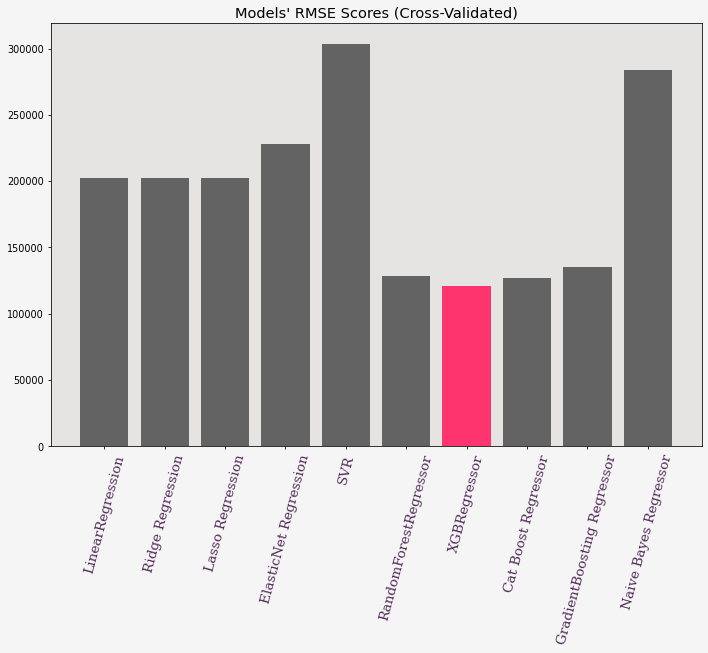

In [143]:
color = ['#636363','#636363','#636363','#636363','#636363','#636363','#fe346e','#636363','#636363','#636363']
fig, ax = plt.subplots(figsize = (12,8), dpi = 70)
ax.set_facecolor('#E5E4E2')
fig.patch.set_facecolor('#f6f5f5')

plt.bar(models["Model"], models["RMSE (Cross-Validation)"], color = color)
plt.title("Models' RMSE Scores (Cross-Validated)", size=15)

ax.set_xticklabels(models['Model'] , rotation = 75, 
                   ha = 'center', **{'font': 'Serif', 'Size': 14,'weight':'normal','color':'#512b58'}, alpha = 1)


ax.spines['bottom'].set_visible(True)

fig.show()

##### Among the 10 models, the model that gave the best results was XGBoost. Now that we've selected the model that works best, model validation is next.

### Hyperparameter Tuning

In [131]:
space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180,
        'seed': 0
    }

In [132]:
def objective(space):
    clf= XGBRegressor(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [( X_train_std, y_train), ( X_test_std, y_test)]
    
    clf.fit(X_train_std, y_train,
            eval_set=evaluation,
            early_stopping_rounds=10,verbose=False)
    

    pred = clf.predict(X_test_std)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    print ("RMSE:", rmse)
    return {'loss': -rmse, 'status': STATUS_OK }

In [133]:
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

  0%|                                   | 0/100 [00:00<?, ?trial/s, best loss=?]

/Users/berkakyildiz/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



RMSE:                                                                           
262565.6656931728                                                               
  1%|         | 1/100 [00:00<00:53,  1.84trial/s, best loss: -262565.6656931728]

/Users/berkakyildiz/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



RMSE:                                                                           
262565.6656931728                                                               
  2%|▏        | 2/100 [00:01<00:58,  1.69trial/s, best loss: -262565.6656931728]

/Users/berkakyildiz/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



RMSE:                                                                           
262565.6656931728                                                               
  3%|▎        | 3/100 [00:01<00:52,  1.84trial/s, best loss: -262565.6656931728]

/Users/berkakyildiz/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



RMSE:                                                                           
262565.6656931728                                                               
  4%|▎        | 4/100 [00:02<00:52,  1.82trial/s, best loss: -262565.6656931728]

/Users/berkakyildiz/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



RMSE:                                                                           
262565.6656931728                                                               
  5%|▍        | 5/100 [00:02<00:53,  1.79trial/s, best loss: -262565.6656931728]

/Users/berkakyildiz/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



RMSE:                                                                           
262565.6656931728                                                               
  6%|▌        | 6/100 [00:03<00:54,  1.74trial/s, best loss: -262565.6656931728]

/Users/berkakyildiz/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



RMSE:                                                                           
262565.6656931728                                                               
  7%|▋        | 7/100 [00:03<00:51,  1.80trial/s, best loss: -262565.6656931728]

/Users/berkakyildiz/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



RMSE:                                                                           
262565.6656931728                                                               
  8%|▋        | 8/100 [00:04<00:53,  1.73trial/s, best loss: -262565.6656931728]

/Users/berkakyildiz/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



RMSE:                                                                           
262565.6656931728                                                               
  9%|▊        | 9/100 [00:05<00:50,  1.79trial/s, best loss: -262565.6656931728]

/Users/berkakyildiz/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



RMSE:                                                                           
262565.6656931728                                                               
 10%|▊       | 10/100 [00:05<00:47,  1.91trial/s, best loss: -262565.6656931728]

/Users/berkakyildiz/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



RMSE:                                                                           
262565.6656931728                                                               
 11%|▉       | 11/100 [00:06<00:47,  1.89trial/s, best loss: -262565.6656931728]

/Users/berkakyildiz/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



RMSE:                                                                           
262565.6656931728                                                               
 12%|▉       | 12/100 [00:06<00:46,  1.91trial/s, best loss: -262565.6656931728]

/Users/berkakyildiz/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



RMSE:                                                                           
262565.6656931728                                                               
 13%|█       | 13/100 [00:07<00:45,  1.89trial/s, best loss: -262565.6656931728]

/Users/berkakyildiz/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



RMSE:                                                                           
262565.6656931728                                                               
 14%|█       | 14/100 [00:07<00:41,  2.05trial/s, best loss: -262565.6656931728]

/Users/berkakyildiz/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



RMSE:                                                                           
262565.6656931728                                                               
 15%|█▏      | 15/100 [00:07<00:41,  2.04trial/s, best loss: -262565.6656931728]

/Users/berkakyildiz/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



RMSE:                                                                           
262565.6656931728                                                               
 16%|█▎      | 16/100 [00:08<00:42,  1.98trial/s, best loss: -262565.6656931728]

/Users/berkakyildiz/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



RMSE:                                                                           
262565.6656931728                                                               
 17%|█▎      | 17/100 [00:08<00:40,  2.03trial/s, best loss: -262565.6656931728]

/Users/berkakyildiz/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



RMSE:                                                                           
262565.6656931728                                                               
 18%|█▍      | 18/100 [00:09<00:38,  2.11trial/s, best loss: -262565.6656931728]

/Users/berkakyildiz/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



RMSE:                                                                           
262565.6656931728                                                               
 19%|█▌      | 19/100 [00:09<00:37,  2.17trial/s, best loss: -262565.6656931728]

/Users/berkakyildiz/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



RMSE:                                                                           
262565.6656931728                                                               
 20%|█▌      | 20/100 [00:10<00:35,  2.25trial/s, best loss: -262565.6656931728]

/Users/berkakyildiz/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



RMSE:                                                                           
262565.6656931728                                                               
 21%|█▋      | 21/100 [00:10<00:34,  2.28trial/s, best loss: -262565.6656931728]

/Users/berkakyildiz/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



RMSE:                                                                           
262565.6656931728                                                               
 22%|█▊      | 22/100 [00:11<00:35,  2.21trial/s, best loss: -262565.6656931728]

/Users/berkakyildiz/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



RMSE:                                                                           
262565.6656931728                                                               
 23%|█▊      | 23/100 [00:11<00:34,  2.26trial/s, best loss: -262565.6656931728]

/Users/berkakyildiz/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



RMSE:                                                                           
262565.6656931728                                                               
 24%|█▉      | 24/100 [00:12<00:36,  2.07trial/s, best loss: -262565.6656931728]

/Users/berkakyildiz/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



RMSE:                                                                           
262565.6656931728                                                               
 25%|██      | 25/100 [00:12<00:36,  2.06trial/s, best loss: -262565.6656931728]

/Users/berkakyildiz/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



RMSE:                                                                           
262565.6656931728                                                               
 26%|██      | 26/100 [00:13<00:36,  2.04trial/s, best loss: -262565.6656931728]

/Users/berkakyildiz/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



RMSE:                                                                           
262565.6656931728                                                               
 27%|██▏     | 27/100 [00:13<00:37,  1.94trial/s, best loss: -262565.6656931728]

/Users/berkakyildiz/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



RMSE:                                                                           
262565.6656931728                                                               
 28%|██▏     | 28/100 [00:14<00:36,  2.00trial/s, best loss: -262565.6656931728]

/Users/berkakyildiz/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



RMSE:                                                                           
262565.6656931728                                                               
 29%|██▎     | 29/100 [00:14<00:35,  1.98trial/s, best loss: -262565.6656931728]

/Users/berkakyildiz/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



RMSE:                                                                           
262565.6656931728                                                               
 30%|██▍     | 30/100 [00:15<00:37,  1.88trial/s, best loss: -262565.6656931728]

/Users/berkakyildiz/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



RMSE:                                                                           
262565.6656931728                                                               
 31%|██▍     | 31/100 [00:15<00:39,  1.75trial/s, best loss: -262565.6656931728]

/Users/berkakyildiz/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



RMSE:                                                                           
262565.6656931728                                                               
 32%|██▌     | 32/100 [00:16<00:38,  1.78trial/s, best loss: -262565.6656931728]

/Users/berkakyildiz/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



RMSE:                                                                           
262565.6656931728                                                               
 33%|██▋     | 33/100 [00:17<00:36,  1.83trial/s, best loss: -262565.6656931728]

/Users/berkakyildiz/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



RMSE:                                                                           
262565.6656931728                                                               
 34%|██▋     | 34/100 [00:17<00:36,  1.80trial/s, best loss: -262565.6656931728]

/Users/berkakyildiz/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



RMSE:                                                                           
262565.6656931728                                                               
 35%|██▊     | 35/100 [00:18<00:35,  1.81trial/s, best loss: -262565.6656931728]

/Users/berkakyildiz/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



RMSE:                                                                           
262565.6656931728                                                               
 36%|██▉     | 36/100 [00:18<00:34,  1.88trial/s, best loss: -262565.6656931728]

/Users/berkakyildiz/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



RMSE:                                                                           
262565.6656931728                                                               
 37%|██▉     | 37/100 [00:19<00:31,  2.02trial/s, best loss: -262565.6656931728]

/Users/berkakyildiz/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



RMSE:                                                                           
262565.6656931728                                                               
 38%|███     | 38/100 [00:19<00:28,  2.14trial/s, best loss: -262565.6656931728]

/Users/berkakyildiz/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



RMSE:                                                                           
262565.6656931728                                                               
 39%|███     | 39/100 [00:20<00:30,  2.01trial/s, best loss: -262565.6656931728]

/Users/berkakyildiz/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



RMSE:                                                                           
262565.6656931728                                                               
 40%|███▏    | 40/100 [00:20<00:27,  2.16trial/s, best loss: -262565.6656931728]

/Users/berkakyildiz/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



RMSE:                                                                           
262565.6656931728                                                               
 41%|███▎    | 41/100 [00:20<00:27,  2.14trial/s, best loss: -262565.6656931728]

/Users/berkakyildiz/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



RMSE:                                                                           
262565.6656931728                                                               
 42%|███▎    | 42/100 [00:21<00:26,  2.20trial/s, best loss: -262565.6656931728]

/Users/berkakyildiz/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



RMSE:                                                                           
262565.6656931728                                                               
 43%|███▍    | 43/100 [00:21<00:22,  2.54trial/s, best loss: -262565.6656931728]

/Users/berkakyildiz/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



RMSE:                                                                           
262565.6656931728                                                               
 44%|███▌    | 44/100 [00:21<00:20,  2.79trial/s, best loss: -262565.6656931728]

/Users/berkakyildiz/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



RMSE:                                                                           
262565.6656931728                                                               
 45%|███▌    | 45/100 [00:22<00:21,  2.60trial/s, best loss: -262565.6656931728]

/Users/berkakyildiz/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



RMSE:                                                                           
262565.6656931728                                                               
 46%|███▋    | 46/100 [00:22<00:23,  2.29trial/s, best loss: -262565.6656931728]

/Users/berkakyildiz/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



RMSE:                                                                           
262565.6656931728                                                               
 47%|███▊    | 47/100 [00:23<00:24,  2.14trial/s, best loss: -262565.6656931728]

/Users/berkakyildiz/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



RMSE:                                                                           
262565.6656931728                                                               
 48%|███▊    | 48/100 [00:23<00:25,  2.08trial/s, best loss: -262565.6656931728]

/Users/berkakyildiz/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



RMSE:                                                                           
262565.6656931728                                                               
 49%|███▉    | 49/100 [00:24<00:25,  2.03trial/s, best loss: -262565.6656931728]

/Users/berkakyildiz/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



RMSE:                                                                           
262565.6656931728                                                               
 50%|████    | 50/100 [00:24<00:25,  1.94trial/s, best loss: -262565.6656931728]

/Users/berkakyildiz/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



RMSE:                                                                           
262565.6656931728                                                               
 51%|████    | 51/100 [00:25<00:24,  1.98trial/s, best loss: -262565.6656931728]

/Users/berkakyildiz/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



RMSE:                                                                           
262565.6656931728                                                               
 52%|████▏   | 52/100 [00:25<00:22,  2.14trial/s, best loss: -262565.6656931728]

/Users/berkakyildiz/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



RMSE:                                                                           
262565.6656931728                                                               
 53%|████▏   | 53/100 [00:26<00:22,  2.05trial/s, best loss: -262565.6656931728]

/Users/berkakyildiz/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



RMSE:                                                                           
262565.6656931728                                                               
 54%|████▎   | 54/100 [00:26<00:22,  2.03trial/s, best loss: -262565.6656931728]

/Users/berkakyildiz/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



RMSE:                                                                           
262565.6656931728                                                               
 55%|████▍   | 55/100 [00:27<00:22,  2.02trial/s, best loss: -262565.6656931728]

/Users/berkakyildiz/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



RMSE:                                                                           
262565.6656931728                                                               
 56%|████▍   | 56/100 [00:27<00:21,  2.00trial/s, best loss: -262565.6656931728]

/Users/berkakyildiz/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



RMSE:                                                                           
262565.6656931728                                                               
 57%|████▌   | 57/100 [00:28<00:22,  1.93trial/s, best loss: -262565.6656931728]

/Users/berkakyildiz/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



RMSE:                                                                           
262565.6656931728                                                               
 58%|████▋   | 58/100 [00:29<00:24,  1.74trial/s, best loss: -262565.6656931728]

/Users/berkakyildiz/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



RMSE:                                                                           
262565.6656931728                                                               
 59%|████▋   | 59/100 [00:29<00:23,  1.78trial/s, best loss: -262565.6656931728]

/Users/berkakyildiz/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



RMSE:                                                                           
262565.6656931728                                                               
 60%|████▊   | 60/100 [00:30<00:21,  1.82trial/s, best loss: -262565.6656931728]

/Users/berkakyildiz/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



RMSE:                                                                           
262565.6656931728                                                               
 61%|████▉   | 61/100 [00:30<00:21,  1.85trial/s, best loss: -262565.6656931728]

/Users/berkakyildiz/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



RMSE:                                                                           
262565.6656931728                                                               
 62%|████▉   | 62/100 [00:31<00:20,  1.85trial/s, best loss: -262565.6656931728]

/Users/berkakyildiz/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



RMSE:                                                                           
262565.6656931728                                                               
 63%|█████   | 63/100 [00:31<00:20,  1.82trial/s, best loss: -262565.6656931728]

/Users/berkakyildiz/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



RMSE:                                                                           
262565.6656931728                                                               
 64%|█████   | 64/100 [00:32<00:20,  1.78trial/s, best loss: -262565.6656931728]

/Users/berkakyildiz/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



RMSE:                                                                           
262565.6656931728                                                               
 65%|█████▏  | 65/100 [00:32<00:19,  1.84trial/s, best loss: -262565.6656931728]

/Users/berkakyildiz/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



RMSE:                                                                           
262565.6656931728                                                               
 66%|█████▎  | 66/100 [00:33<00:17,  1.98trial/s, best loss: -262565.6656931728]

/Users/berkakyildiz/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



RMSE:                                                                           
262565.6656931728                                                               
 67%|█████▎  | 67/100 [00:33<00:16,  2.04trial/s, best loss: -262565.6656931728]

/Users/berkakyildiz/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



RMSE:                                                                           
262565.6656931728                                                               
 68%|█████▍  | 68/100 [00:34<00:16,  1.89trial/s, best loss: -262565.6656931728]

/Users/berkakyildiz/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



RMSE:                                                                           
262565.6656931728                                                               
 69%|█████▌  | 69/100 [00:34<00:15,  2.02trial/s, best loss: -262565.6656931728]

/Users/berkakyildiz/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



RMSE:                                                                           
262565.6656931728                                                               
 70%|█████▌  | 70/100 [00:35<00:15,  1.89trial/s, best loss: -262565.6656931728]

/Users/berkakyildiz/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



RMSE:                                                                           
262565.6656931728                                                               
 71%|█████▋  | 71/100 [00:36<00:15,  1.81trial/s, best loss: -262565.6656931728]

/Users/berkakyildiz/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



RMSE:                                                                           
262565.6656931728                                                               
 72%|█████▊  | 72/100 [00:36<00:15,  1.78trial/s, best loss: -262565.6656931728]

/Users/berkakyildiz/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



RMSE:                                                                           
262565.6656931728                                                               
 73%|█████▊  | 73/100 [00:37<00:14,  1.86trial/s, best loss: -262565.6656931728]

/Users/berkakyildiz/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



RMSE:                                                                           
262565.6656931728                                                               
 74%|█████▉  | 74/100 [00:37<00:13,  1.91trial/s, best loss: -262565.6656931728]

/Users/berkakyildiz/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



RMSE:                                                                           
262565.6656931728                                                               
 75%|██████  | 75/100 [00:38<00:13,  1.80trial/s, best loss: -262565.6656931728]

/Users/berkakyildiz/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



RMSE:                                                                           
262565.6656931728                                                               
 76%|██████  | 76/100 [00:38<00:14,  1.71trial/s, best loss: -262565.6656931728]

/Users/berkakyildiz/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



RMSE:                                                                           
262565.6656931728                                                               
 77%|██████▏ | 77/100 [00:39<00:13,  1.67trial/s, best loss: -262565.6656931728]

/Users/berkakyildiz/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



RMSE:                                                                           
262565.6656931728                                                               
 78%|██████▏ | 78/100 [00:40<00:13,  1.63trial/s, best loss: -262565.6656931728]

/Users/berkakyildiz/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



RMSE:                                                                           
262565.6656931728                                                               
 79%|██████▎ | 79/100 [00:40<00:12,  1.71trial/s, best loss: -262565.6656931728]

/Users/berkakyildiz/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



RMSE:                                                                           
262565.6656931728                                                               
 80%|██████▍ | 80/100 [00:41<00:12,  1.63trial/s, best loss: -262565.6656931728]

/Users/berkakyildiz/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



RMSE:                                                                           
262565.6656931728                                                               
 81%|██████▍ | 81/100 [00:42<00:12,  1.58trial/s, best loss: -262565.6656931728]

/Users/berkakyildiz/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



RMSE:                                                                           
262565.6656931728                                                               
 82%|██████▌ | 82/100 [00:42<00:11,  1.51trial/s, best loss: -262565.6656931728]

/Users/berkakyildiz/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



RMSE:                                                                           
262565.6656931728                                                               
 83%|██████▋ | 83/100 [00:43<00:11,  1.52trial/s, best loss: -262565.6656931728]

/Users/berkakyildiz/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



RMSE:                                                                           
262565.6656931728                                                               
 84%|██████▋ | 84/100 [00:44<00:10,  1.53trial/s, best loss: -262565.6656931728]

/Users/berkakyildiz/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



RMSE:                                                                           
262565.6656931728                                                               
 85%|██████▊ | 85/100 [00:44<00:09,  1.57trial/s, best loss: -262565.6656931728]

/Users/berkakyildiz/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



RMSE:                                                                           
262565.6656931728                                                               
 86%|██████▉ | 86/100 [00:45<00:08,  1.72trial/s, best loss: -262565.6656931728]

/Users/berkakyildiz/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



RMSE:                                                                           
262565.6656931728                                                               
 87%|██████▉ | 87/100 [00:45<00:07,  1.80trial/s, best loss: -262565.6656931728]

/Users/berkakyildiz/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



RMSE:                                                                           
262565.6656931728                                                               
 88%|███████ | 88/100 [00:46<00:06,  1.83trial/s, best loss: -262565.6656931728]

/Users/berkakyildiz/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



RMSE:                                                                           
262565.6656931728                                                               
 89%|███████ | 89/100 [00:46<00:06,  1.79trial/s, best loss: -262565.6656931728]

/Users/berkakyildiz/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



RMSE:                                                                           
262565.6656931728                                                               
 90%|███████▏| 90/100 [00:47<00:05,  1.76trial/s, best loss: -262565.6656931728]

/Users/berkakyildiz/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



RMSE:                                                                           
262565.6656931728                                                               
 91%|███████▎| 91/100 [00:47<00:04,  1.83trial/s, best loss: -262565.6656931728]

/Users/berkakyildiz/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



RMSE:                                                                           
262565.6656931728                                                               
 92%|███████▎| 92/100 [00:48<00:04,  1.98trial/s, best loss: -262565.6656931728]

/Users/berkakyildiz/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



RMSE:                                                                           
262565.6656931728                                                               
 93%|███████▍| 93/100 [00:48<00:03,  2.01trial/s, best loss: -262565.6656931728]

/Users/berkakyildiz/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



RMSE:                                                                           
262565.6656931728                                                               
 94%|███████▌| 94/100 [00:49<00:03,  1.82trial/s, best loss: -262565.6656931728]

/Users/berkakyildiz/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



RMSE:                                                                           
262565.6656931728                                                               
 95%|███████▌| 95/100 [00:49<00:02,  1.84trial/s, best loss: -262565.6656931728]

/Users/berkakyildiz/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



RMSE:                                                                           
262565.6656931728                                                               
 96%|███████▋| 96/100 [00:50<00:02,  2.00trial/s, best loss: -262565.6656931728]

/Users/berkakyildiz/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



RMSE:                                                                           
262565.6656931728                                                               
 97%|███████▊| 97/100 [00:50<00:01,  1.89trial/s, best loss: -262565.6656931728]

/Users/berkakyildiz/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



RMSE:                                                                           
262565.6656931728                                                               
 98%|███████▊| 98/100 [00:51<00:01,  1.87trial/s, best loss: -262565.6656931728]

/Users/berkakyildiz/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



RMSE:                                                                           
262565.6656931728                                                               
 99%|███████▉| 99/100 [00:51<00:00,  1.84trial/s, best loss: -262565.6656931728]

/Users/berkakyildiz/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



RMSE:                                                                           
262565.6656931728                                                               
100%|███████| 100/100 [00:52<00:00,  1.91trial/s, best loss: -262565.6656931728]


In [134]:
print("The best hyperparameters are : ","\n")
print(best_hyperparams)

The best hyperparameters are :  

{'colsample_bytree': 0.9413613885921421, 'gamma': 3.8878216755921224, 'max_depth': 14.0, 'min_child_weight': 5.0, 'reg_alpha': 171.0, 'reg_lambda': 0.5045473994413326}


In [136]:
tuning_model = XGBRegressor(colsample_bytree = 0.9413613885921421, gamma = 3.8878216755921224, max_depth = 14,
                           min_child_weight = 5, reg_alpha = 171, reg_lambda = 0.5045473994413326)

In [137]:
tuning_model.fit(X_train_std, y_train)
y_pred = tuning_model.predict(X_test_std)

In [138]:
mae, mse, rmse, r_squared = evaluation(y_test, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(tuning_model)
print("RMSE Cross-Validation:", rmse_cross_val)

MAE: 73305.72026797279
MSE: 22365901613.325817
RMSE: 149552.33737165667
R2 Score: 0.850482941251532
------------------------------
RMSE Cross-Validation: 134068.24938140964


In [141]:
y_pred[:10] #Predicted Values

array([ 374039.  ,  768473.6 , 1060661.4 , 1559866.5 ,  724249.8 ,
        247002.34,  857335.75,  551436.8 ,  433198.25,  542118.8 ],
      dtype=float32)

In [142]:
y_test[0:10] #True Values

735       365000.0
2830      865000.0
4106     1038000.0
16218    1490000.0
19964     711000.0
1227      211000.0
18849     790000.0
19369     680000.0
20164     384500.0
7139      605000.0
Name: price, dtype: float64

#### In the last part, our r2 score was 85%, which is a good rate. Remember to compare the actual values with the predicted values to see how accurate our prediction model is. I wanted to show you the first 10 values from this study. The estimated values are very close to the actual values. The performance of the model is successful.